In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import mode
%matplotlib inline

sns.set_style('whitegrid')

# Behavioural Segmentation


In [ ]:
behaviour_path = "/content/behavioural_dataset.csv"
data = pd.read_csv(behaviour_path)
data

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [ ]:
print(pd.isnull(data).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [ ]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'EV_Price'},inplace=True)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [ ]:
# Extract continuous variables
continuous_vars = ['Age', 'No of Dependents','Total Salary','EV_Price']

# Perform standard scaling
scaler = StandardScaler()
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])
data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,-1.498630,Salaried,Single,Post Graduate,-1.642313,Yes,-1.406760,-0.904843
1,-0.211304,Salaried,Married,Post Graduate,-0.136859,Yes,-0.258937,-0.445579
2,1.397855,Business,Married,Graduate,1.368594,Yes,-0.450240,0.013685
3,0.754191,Business,Married,Post Graduate,0.615867,No,-0.067633,0.013685
4,-0.854967,Salaried,Married,Post Graduate,-0.136859,Yes,0.314975,0.932213
...,...,...,...,...,...,...,...,...
94,-1.498630,Business,Single,Graduate,-1.642313,No,0.123671,0.932213
95,2.202434,Salaried,Married,Post Graduate,0.615867,No,2.706274,0.932213
96,2.363350,Business,Married,Graduate,-0.136859,Yes,-0.067633,-0.215947
97,2.363350,Salaried,Married,Post Graduate,-0.136859,No,1.654102,0.702581


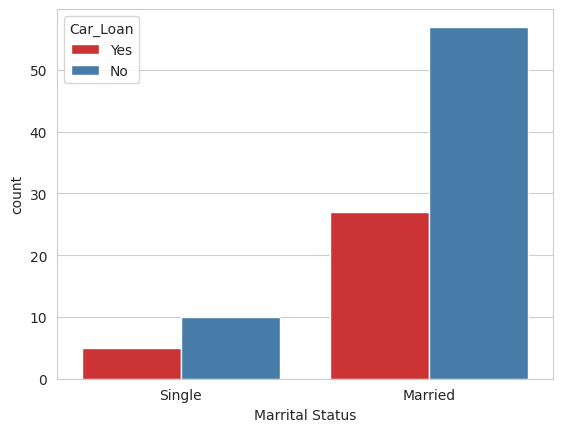

In [ ]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = data, palette = 'Set1')
plt.show()

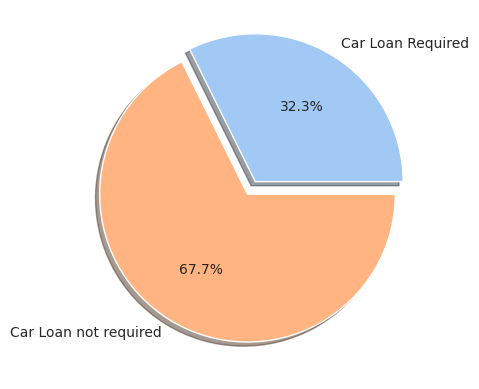

In [ ]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
loan_status = [data[data['Car_Loan'] == "Yes"].shape[0],data[data['Car_Loan'] == "No"].shape[0]]

palette_color = sns.color_palette('pastel')

# declaring exploding pie
explode = [0.1, 0]

# plotting data on chart
plt.pie(loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

# displaying chart
plt.show()

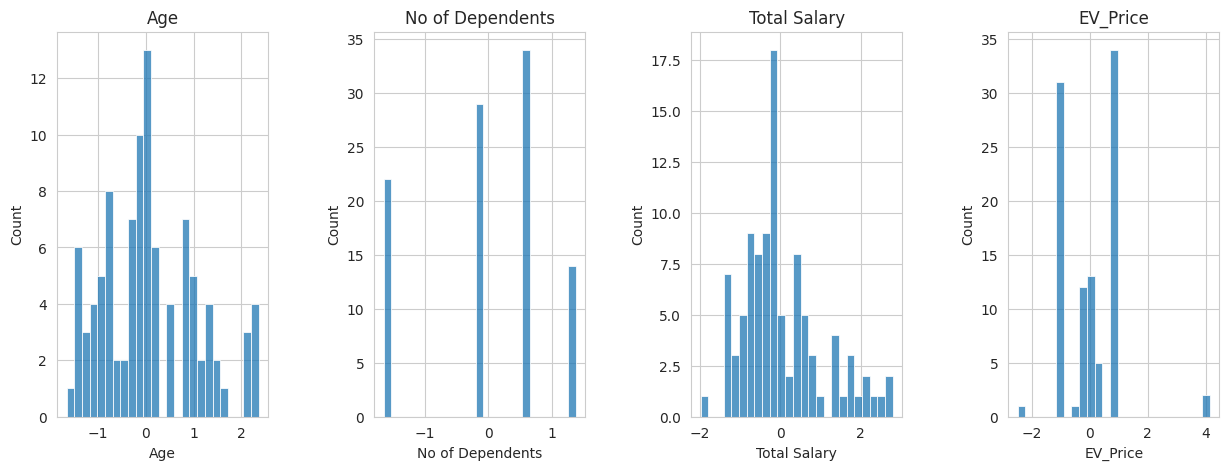

In [ ]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [ ]:
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values

In [ ]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

In [ ]:
cols = ['Profession','Marrital Status','Education','Car_Loan']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,-1.498630,1,1,1,-1.642313,1,-1.406760,-0.904843
1,-0.211304,1,0,1,-0.136859,1,-0.258937,-0.445579
2,1.397855,0,0,0,1.368594,1,-0.450240,0.013685
3,0.754191,0,0,1,0.615867,0,-0.067633,0.013685
4,-0.854967,1,0,1,-0.136859,1,0.314975,0.932213
...,...,...,...,...,...,...,...,...
94,-1.498630,0,1,0,-1.642313,0,0.123671,0.932213
95,2.202434,1,0,1,0.615867,0,2.706274,0.932213
96,2.363350,0,0,0,-0.136859,1,-0.067633,-0.215947
97,2.363350,1,0,1,-0.136859,0,1.654102,0.702581


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               99 non-null     float64
 1   Profession        99 non-null     int64  
 2   Marrital Status   99 non-null     int64  
 3   Education         99 non-null     int64  
 4   No of Dependents  99 non-null     float64
 5   Car_Loan          99 non-null     int64  
 6   Total Salary      99 non-null     float64
 7   EV_Price          99 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 6.3 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

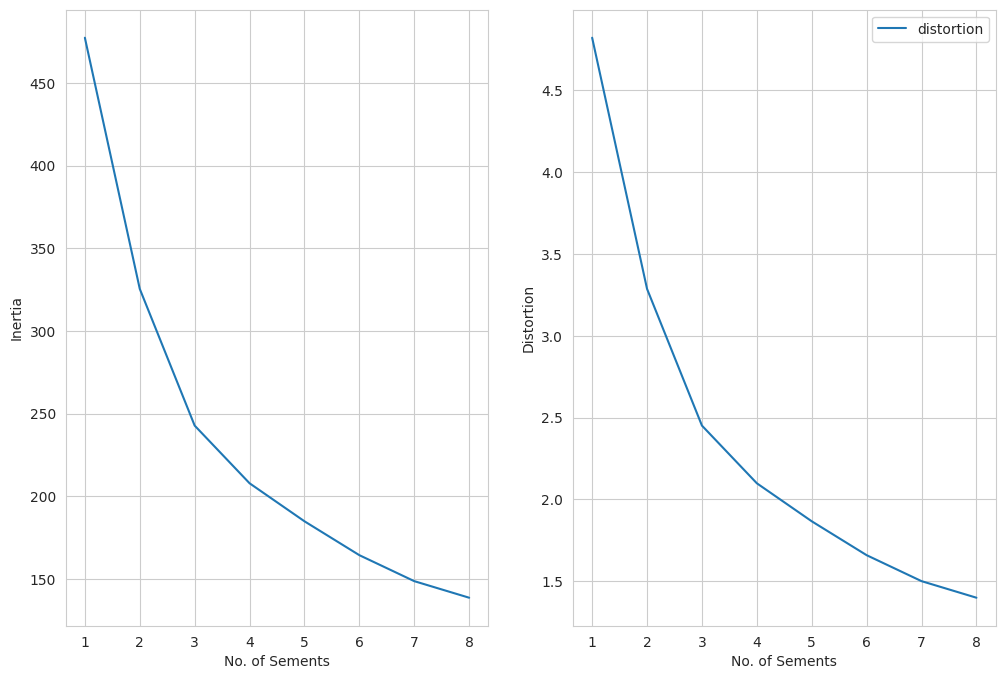

In [ ]:
cluster_range = np.arange(1,9)
labels_true = []
inertia = []
for i in cluster_range:
  km = KMeans(n_clusters = i)
  km.fit(data)
  inertia.append(km.inertia_)
  labels_true.append(km.labels_)

distortion = [inertia[i] / data.shape[0] for i in range(len(inertia))]

fig,ax = plt.subplots(figsize = (12,8),nrows = 1 , ncols = 2)
ax[0].plot(cluster_range,inertia,label = 'inertia')
ax[0].set_ylabel('Inertia')
ax[0].set_xlabel('No. of Sements')
ax[1].plot(cluster_range,distortion, label = 'distortion')
ax[1].set_ylabel('Distortion')
ax[1].set_xlabel('No. of Sements')
plt.legend()
plt.show()

Text(0, 0.5, 'Sum of within clusters')

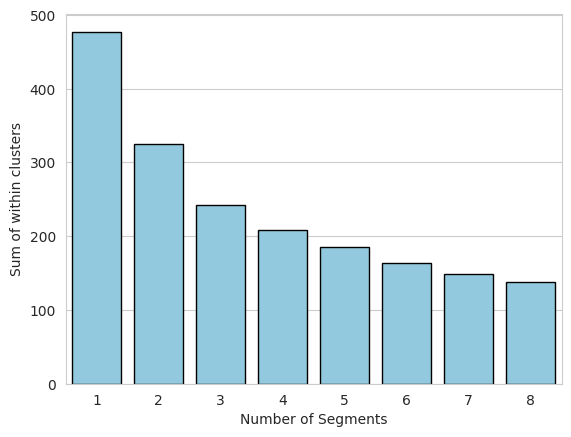

In [ ]:
sns.barplot(x= cluster_range, y=inertia, color='skyblue', edgecolor='black')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of within clusters')

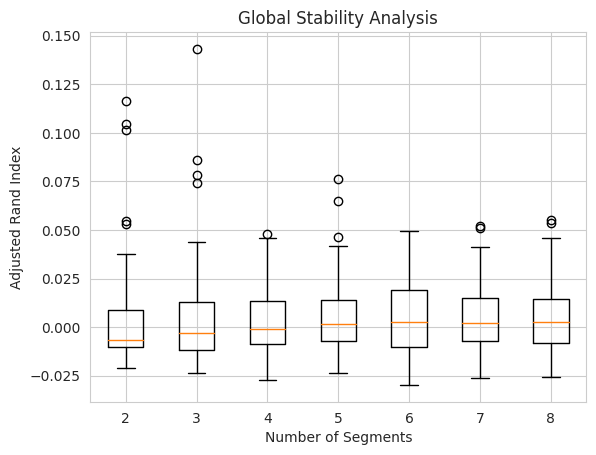

In [ ]:
# Set seed for reproducibility
np.random.seed(1234)

# Number of segments (clusters) to consider
num_segments_range = np.arange(2, 9)

# Number of bootstrap samples
nboot = 100

# Number of random initializations for k-means
nrep = 10

# Function to calculate adjusted Rand index for clustering
def calculate_adjusted_rand_index(labels_true, labels_pred):
    return adjusted_rand_score(labels_true, labels_pred)

def bootstrap_stability_analysis(data, num_segments, nboot, nrep):
  stability_scores = []
  # Store labels_pred from each bootstrap
  all_labels = []

  for _ in range(nboot):

      # Bootstrap sample
      bootstrap_sample = resample(data, replace=True)

      # K-means
      kmeans = KMeans(n_clusters=num_segments, n_init=nrep)
      labels_pred = kmeans.fit_predict(bootstrap_sample)

      # Store labels_pred
      all_labels.append(labels_pred)

  # Get labels_true as mode across all bootstraps
  stacked = np.stack(all_labels)
  labels_true = mode(stacked, axis=0).mode

  for labels_pred in all_labels:

      # Calculate ARI for each bootstrap
      ari = calculate_adjusted_rand_index(labels_true, labels_pred)
      stability_scores.append(ari)

  return np.array(stability_scores)

stability_results = []

for num_segments in num_segments_range:
  stability_scores = bootstrap_stability_analysis(data, num_segments, nboot, nrep)
  stability_results.append(stability_scores)

plt.boxplot(stability_results, labels=num_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


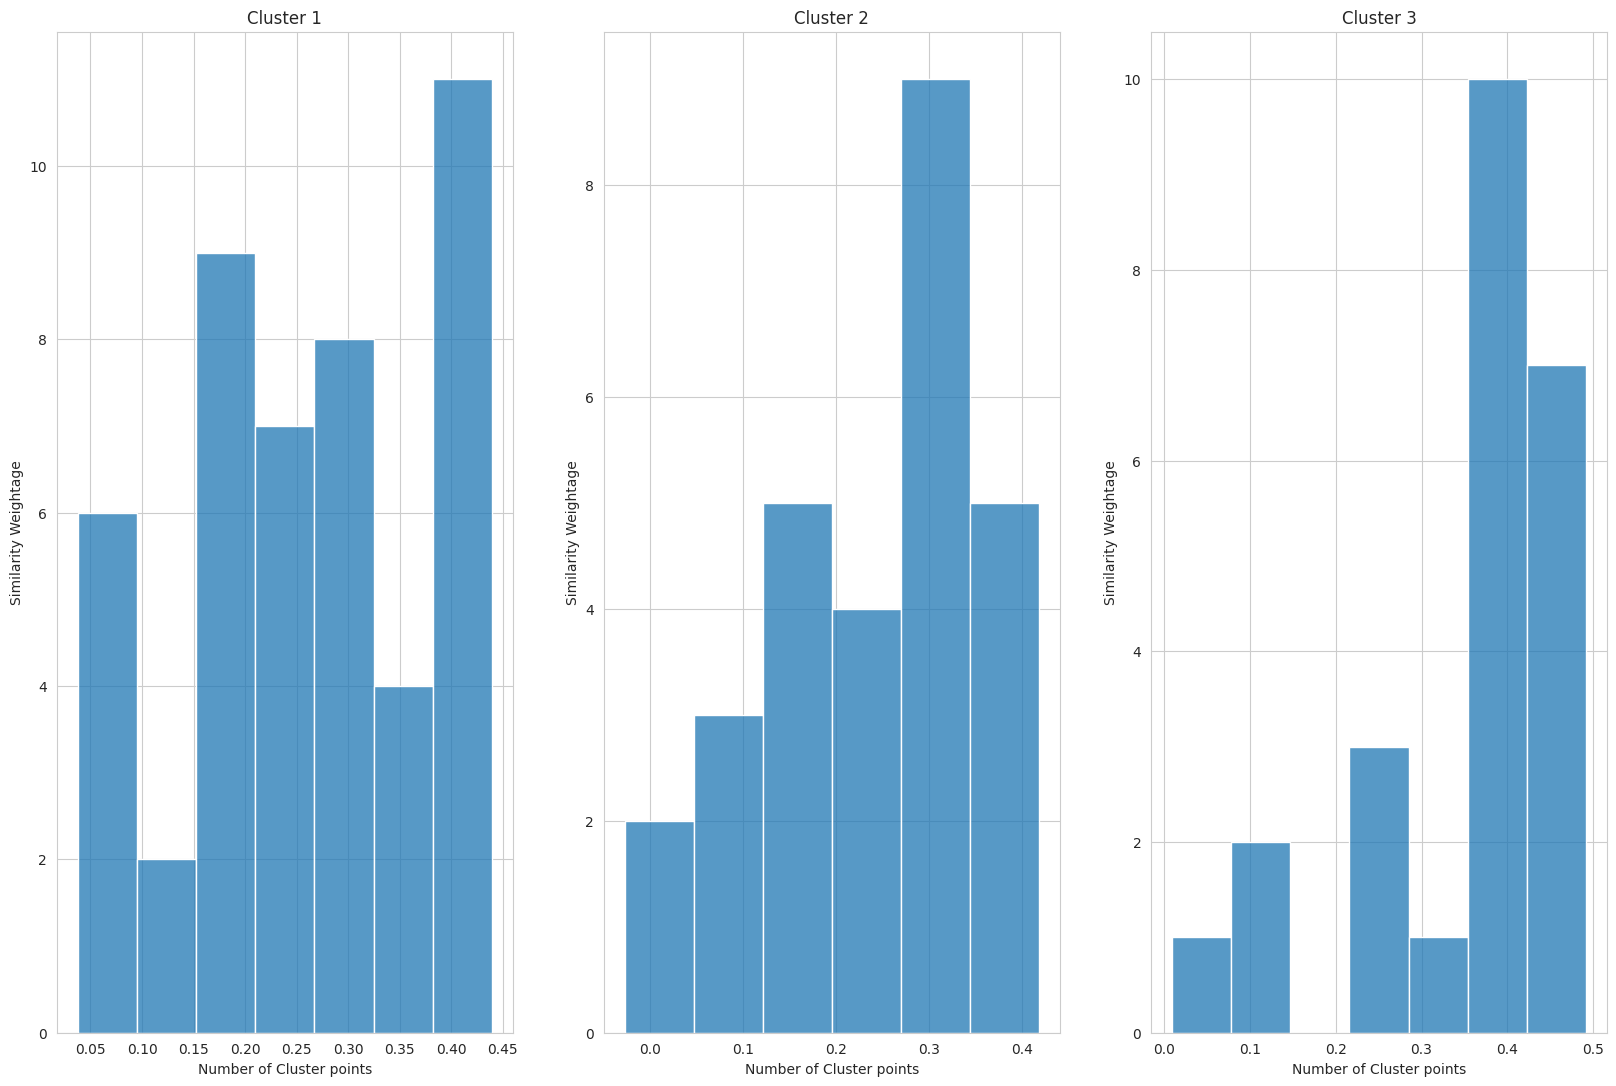

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 123)
labels = kmeans.fit_predict(data)

silhouette_avg = silhouette_score(data,labels)
sample_silhouette_values = silhouette_samples(data, labels)
fig,ax = plt.subplots(figsize = (20,13), nrows = 1, ncols = 3)

plt.title('Gorge Plot for 3 selected Segments or Clusters using Global Stability')

first_cluster_silhouette_values = sample_silhouette_values[labels == 0]
first_cluster_silhouette_values.sort()

ax[0].set_title('Cluster 1')
ax[0].set_xlabel('Number of Cluster points')
ax[0].set_ylabel('Similarity Weightage')

sns.histplot(first_cluster_silhouette_values,ax = ax[0])

second_cluster_silhouette_values = sample_silhouette_values[labels == 1]
second_cluster_silhouette_values.sort()

ax[1].set_title('Cluster 2')
ax[1].set_xlabel('Number of Cluster points')
ax[1].set_ylabel('Similarity Weightage')

sns.histplot(second_cluster_silhouette_values,ax = ax[1])

third_cluster_silhouette_values = sample_silhouette_values[labels == 2]
third_cluster_silhouette_values.sort()

ax[2].set_title('Cluster 3')
ax[2].set_xlabel('Number of Cluster points')
ax[2].set_ylabel('Similarity Weightage')

sns.histplot(third_cluster_silhouette_values,ax = ax[2])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

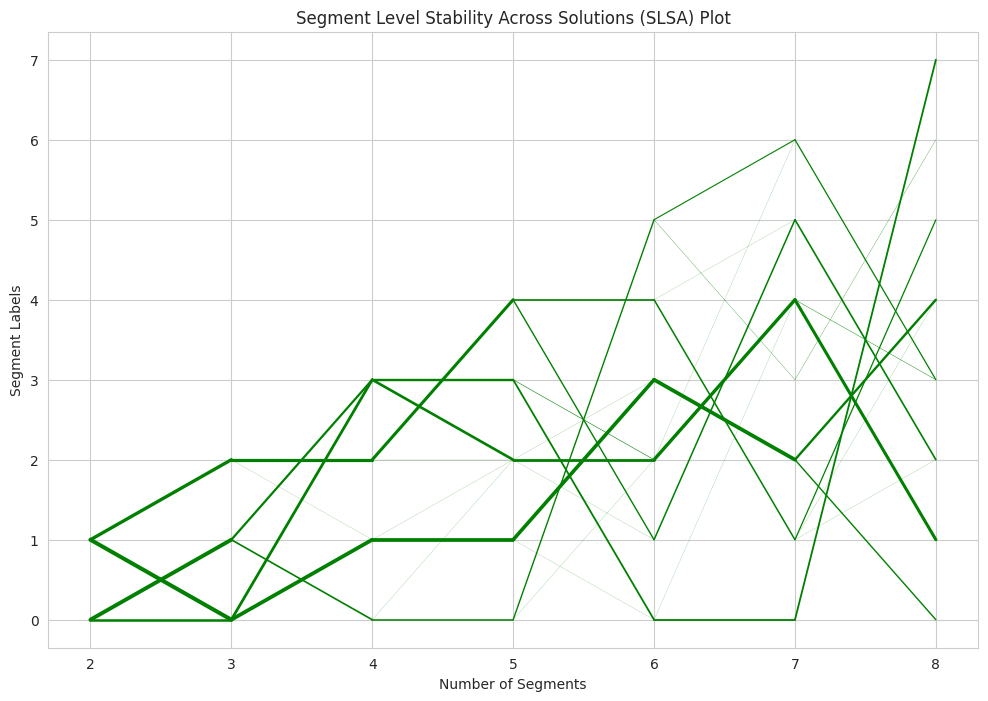

In [ ]:
#identifying natural segment across solutions

num_clusters_range = range(2,9)
cluster_results = []

for num_cluster in num_clusters_range:
  kmeans_model = KMeans(n_clusters = num_cluster, random_state = 123)
  labels = kmeans_model.fit_predict(data)
  cluster_results.append(labels)

fig,ax = plt.subplots(figsize = (12,8))
for i in range(len(num_clusters_range) - 1):
    current_labels = cluster_results[i]
    next_labels = cluster_results[i + 1]

    # Count the occurrences of each label pair
    label_pairs, counts = np.unique((current_labels, next_labels), axis=1, return_counts=True)

    for label_pair, count in zip(label_pairs.T, counts):
        ax.plot([i, i + 1], label_pair, linewidth=count/10, color='green')

ax.set_xticks(range(len(num_clusters_range)))
ax.set_xticklabels(num_clusters_range)
ax.set_xlabel('Number of Segments')
ax.set_ylabel('Segment Labels')
ax.set_title('Segment Level Stability Across Solutions (SLSA) Plot')

plt.show()


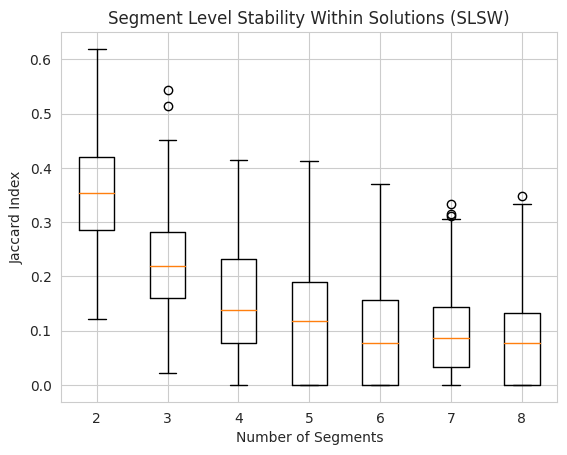

In [ ]:
# Set seed for reproducibility
np.random.seed(1234)

# Function to calculate Jaccard index
def jaccard_index(seg1, seg2):
    intersection = np.sum(np.logical_and(seg1, seg2))
    union = np.sum(np.logical_or(seg1, seg2))
    return intersection / union if union != 0 else 0

# Function to calculate Segment Level Stability Within Solutions (SLSW)
def slsw(data, k, nboot, nrep):
    all_segments = []

    for _ in range(nboot):
        bootstrap_sample = resample(data, replace=True)
        kmeans = KMeans(n_clusters=k, n_init=nrep)
        labels_pred = kmeans.fit_predict(bootstrap_sample)
        all_segments.append(labels_pred)

    # Get labels_true as mode across all bootstraps
    stacked = np.stack(all_segments)
    labels_true = mode(stacked, axis=0).mode

    # Calculate Jaccard index for each segment
    jaccard_indices = []

    for i in range(k):
        jaccard_values = []
        for j in range(nboot):
            jaccard_values.append(jaccard_index(labels_true == i, all_segments[j] == i))
        jaccard_indices.append(jaccard_values)

    return np.array(jaccard_indices)

# Example usage with an artificial dataset

num_segments_range = np.arange(2, 9)
nboot = 100
nrep = 10

# Calculate SLSW for each number of segments
slsw_results = []

for num_segments in num_segments_range:
    slsw_values = slsw(data, num_segments, nboot, nrep)
    slsw_results.append(slsw_values)

# Flatten the 2D arrays within slsw_results
flattened_results = [arr.flatten() for arr in slsw_results]

# Plot boxplots for flattened SLSW values
plt.boxplot(flattened_results, labels=num_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Jaccard Index')
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.show()

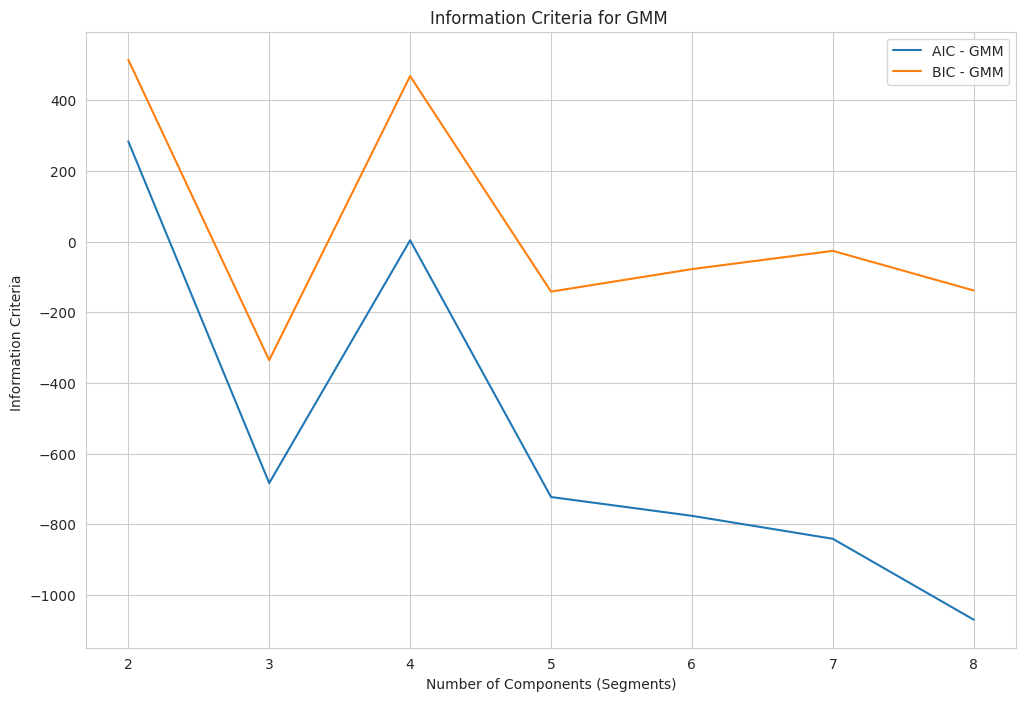

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# Number of components (segments) to consider
num_components_range = range(2, 9)

# Number of random restarts for Gaussian Mixture Model
n_init = 10

# Perform Gaussian Mixture Model with varying number of components
gm_results = {'AIC': [], 'BIC': []}

for num_components in num_components_range:
    gmm = GaussianMixture(n_components=num_components, n_init=n_init, random_state=1234)
    gmm.fit(data)
    gm_results['AIC'].append(gmm.aic(data))
    gm_results['BIC'].append(gmm.bic(data))

# Plotting the Information Criteria
fig, ax = plt.subplots(figsize=(12, 8))

for criterion, label in zip(['AIC', 'BIC'], ['AIC', 'BIC']):
    ax.plot(num_components_range,gm_results[criterion],  label=f'{label} - GMM')


ax.set_xlabel('Number of Components (Segments)')
ax.set_ylabel('Information Criteria ')
ax.legend()
plt.title('Information Criteria for GMM ')
plt.show()

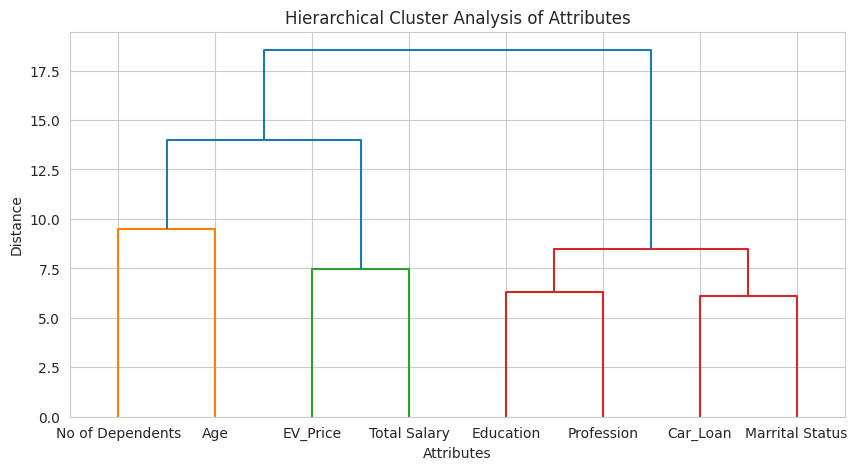

In [ ]:
# Calculate hierarchical clustering
MD_vclust = linkage(data.T, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=data.columns, orientation='top', leaf_font_size=10, distance_sort='descending')
plt.title('Hierarchical Cluster Analysis of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

In [ ]:
num_segments = 3
n_rep = 10
kmeans_model = KMeans(n_clusters = num_segments, random_state = 123, n_init= n_rep)
labels = kmeans_model.fit_predict(data)

data['labels'] = pd.Series(labels)
data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,labels
0,-1.498630,1,1,1,-1.642313,1,-1.406760,-0.904843,2
1,-0.211304,1,0,1,-0.136859,1,-0.258937,-0.445579,0
2,1.397855,0,0,0,1.368594,1,-0.450240,0.013685,0
3,0.754191,0,0,1,0.615867,0,-0.067633,0.013685,0
4,-0.854967,1,0,1,-0.136859,1,0.314975,0.932213,1
...,...,...,...,...,...,...,...,...,...
94,-1.498630,0,1,0,-1.642313,0,0.123671,0.932213,2
95,2.202434,1,0,1,0.615867,0,2.706274,0.932213,1
96,2.363350,0,0,0,-0.136859,1,-0.067633,-0.215947,0
97,2.363350,1,0,1,-0.136859,0,1.654102,0.702581,1


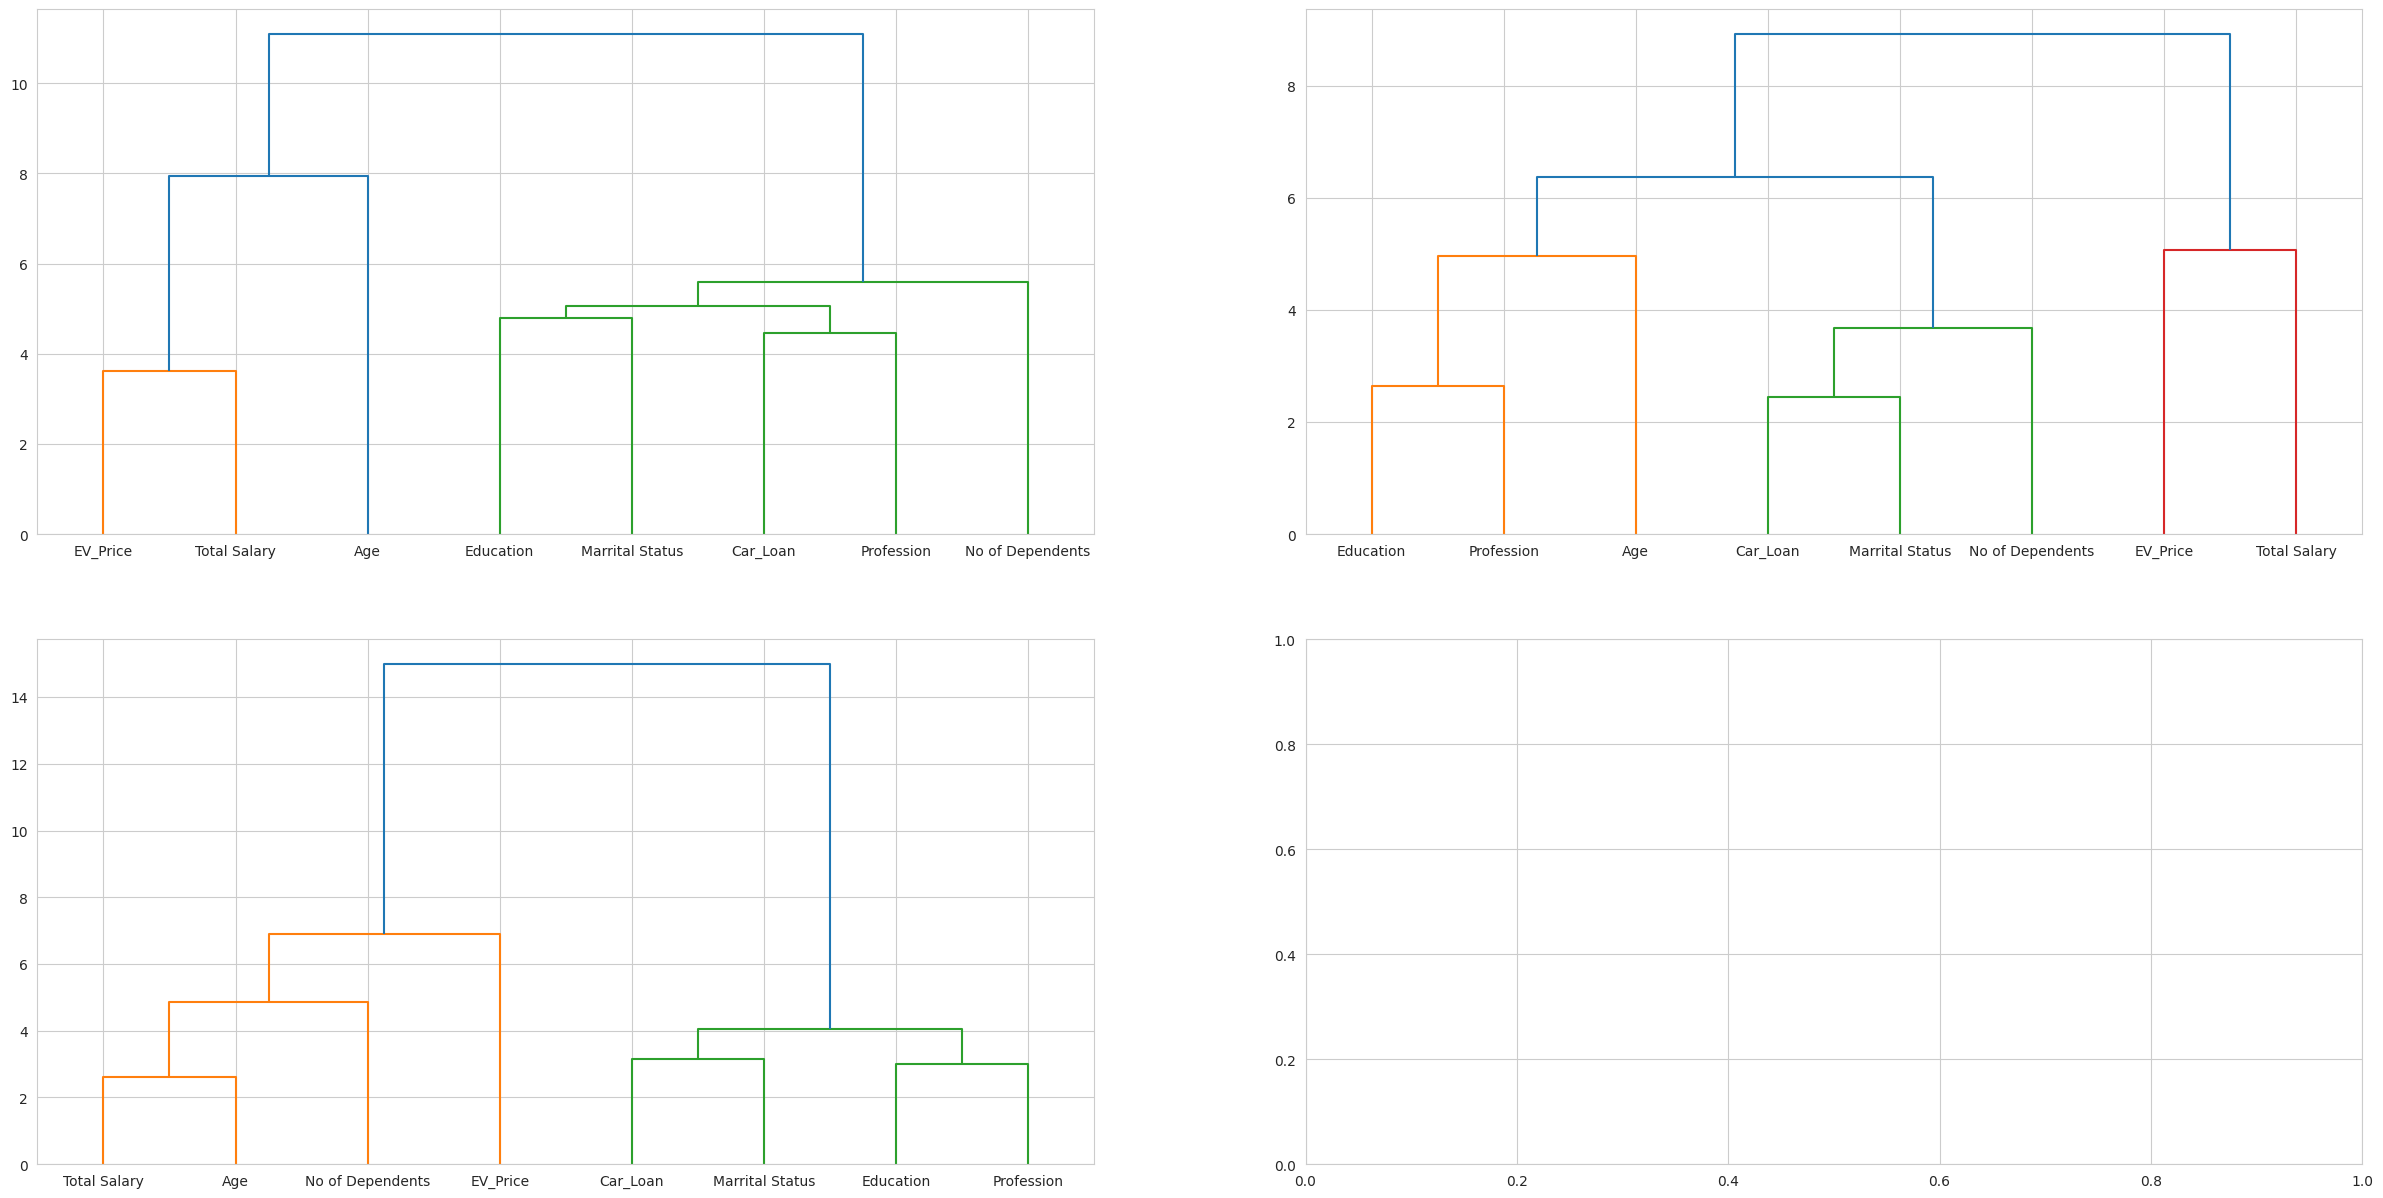

In [ ]:
cluster_0 = data[data['labels'] == 0].drop(columns = ['labels'])
cluster_1 = data[data['labels'] == 1].drop(columns = ['labels'])
cluster_2 = data[data['labels'] == 2].drop(columns = ['labels'])



#hierachical_clustering of cluster_1 data samples
cluster_0_linkage = linkage(cluster_0.T, method='ward')
cluster_1_linkage = linkage(cluster_1.T, method='ward')
cluster_2_linkage = linkage(cluster_2.T, method='ward')


fig,ax = plt.subplots(figsize = (30,15),nrows = 2, ncols = 2)
dendrogram(cluster_0_linkage, labels=cluster_0.columns, orientation='top', leaf_font_size=10, distance_sort='descending', ax = ax[0][0])
dendrogram(cluster_1_linkage, labels=cluster_1.columns, orientation='top', leaf_font_size=10, distance_sort='descending', ax = ax[0][1])
dendrogram(cluster_2_linkage, labels=cluster_2.columns, orientation='top', leaf_font_size=10, distance_sort='descending', ax = ax[1][0])


plt.show()

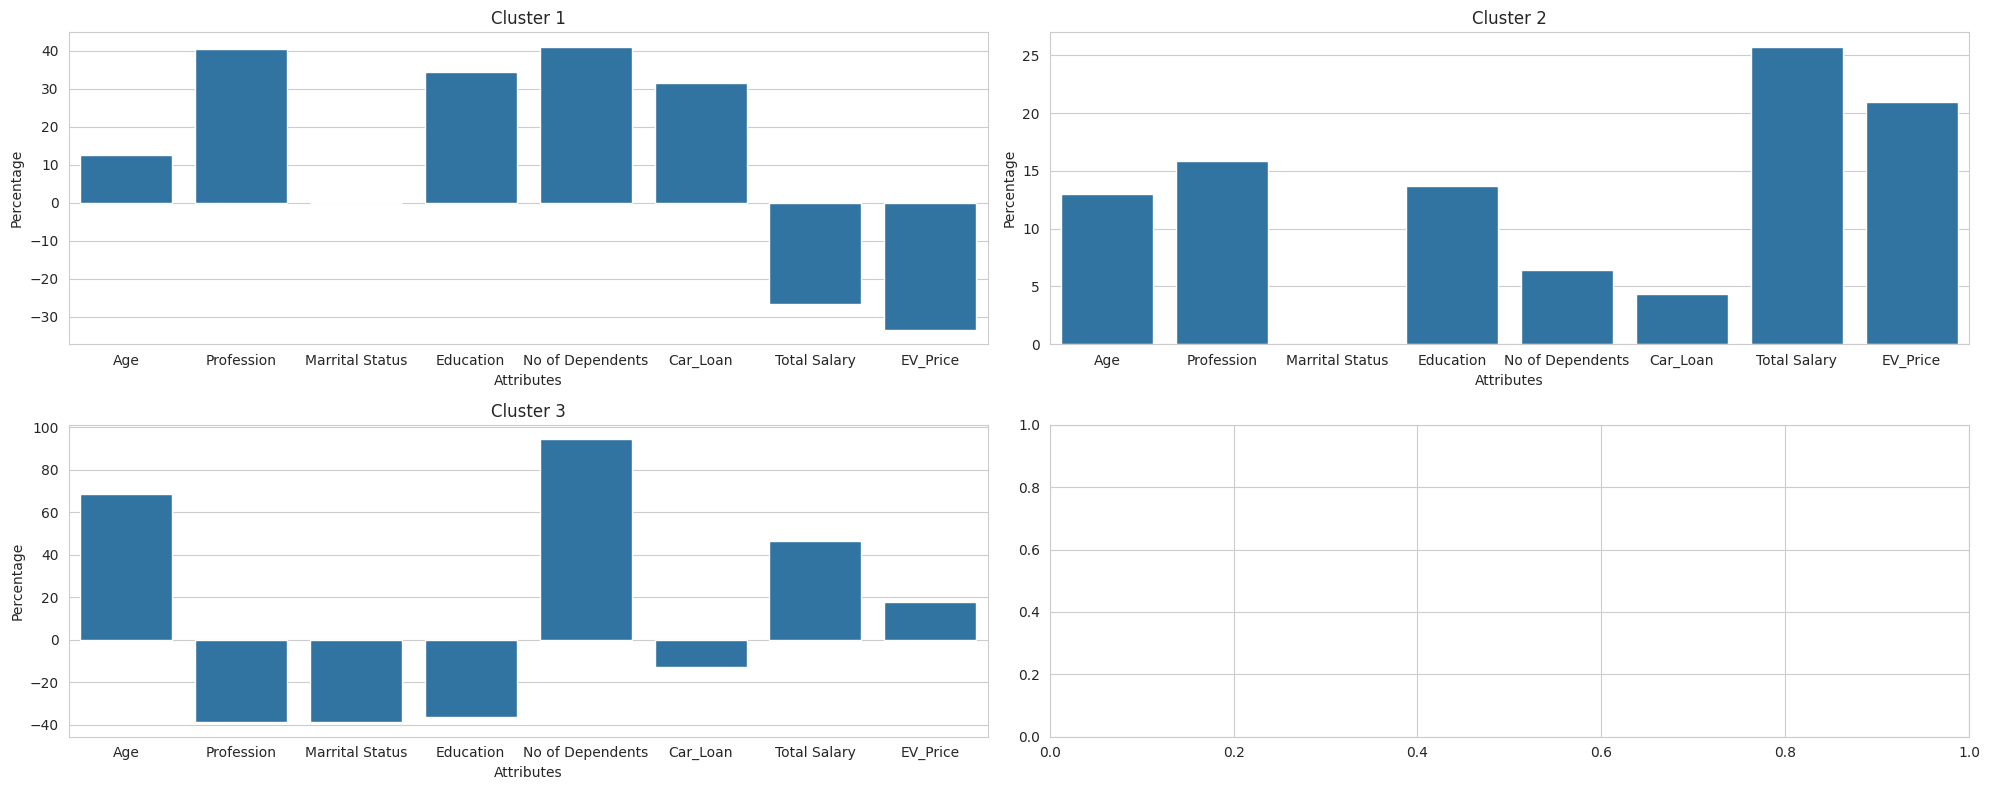

In [ ]:
stats_cluster_0 = np.sum(cluster_0, axis = 0)*100/np.sum(np.sum(cluster_0, axis = 0))
stats_cluster_1 = np.sum(cluster_1, axis = 0)*100/np.sum(np.sum(cluster_1, axis = 0))
stats_cluster_2 = np.sum(cluster_2, axis = 0)*100/np.sum(np.sum(cluster_2, axis = 0))


fig,ax = plt.subplots(figsize = (20,8), nrows = 2, ncols = 2)
sns.barplot(stats_cluster_0, ax = ax[0][0])

ax[0][0].set_title('Cluster 1')
ax[0][0].set_xlabel('Attributes')
ax[0][0].set_ylabel('Percentage')

sns.barplot(stats_cluster_1, ax = ax[0][1])


ax[0][1].set_title('Cluster 2')
ax[0][1].set_xlabel('Attributes')
ax[0][1].set_ylabel('Percentage')

sns.barplot(stats_cluster_2, ax = ax[1][0])


ax[1][0].set_title('Cluster 3')
ax[1][0].set_xlabel('Attributes')
ax[1][0].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

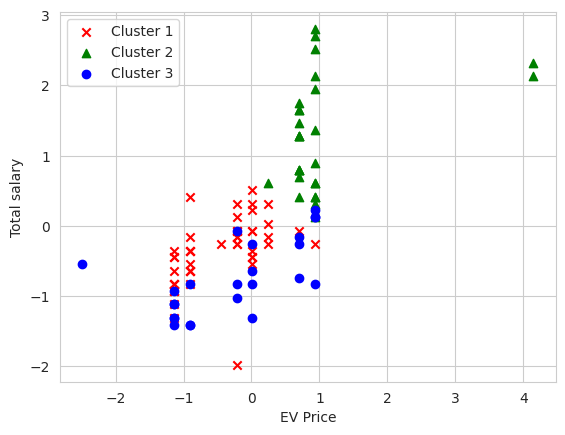

In [ ]:

# plotting the effct of salary and ev price on cluster data
Cluster_0 = data[data['labels'] == 0]
Cluster_1 = data[data['labels'] == 1]
Cluster_2 = data[data['labels'] == 2]

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green',marker = '^', label = 'Cluster 2')
plt.scatter(Cluster_2.EV_Price, Cluster_2['Total Salary'],color='blue', label = 'Cluster 3')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

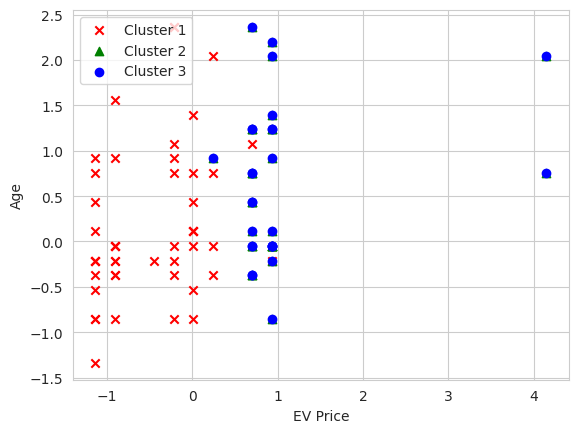

In [ ]:

plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green',marker = '^', label = 'Cluster 2')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='blue', label = 'Cluster 3')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

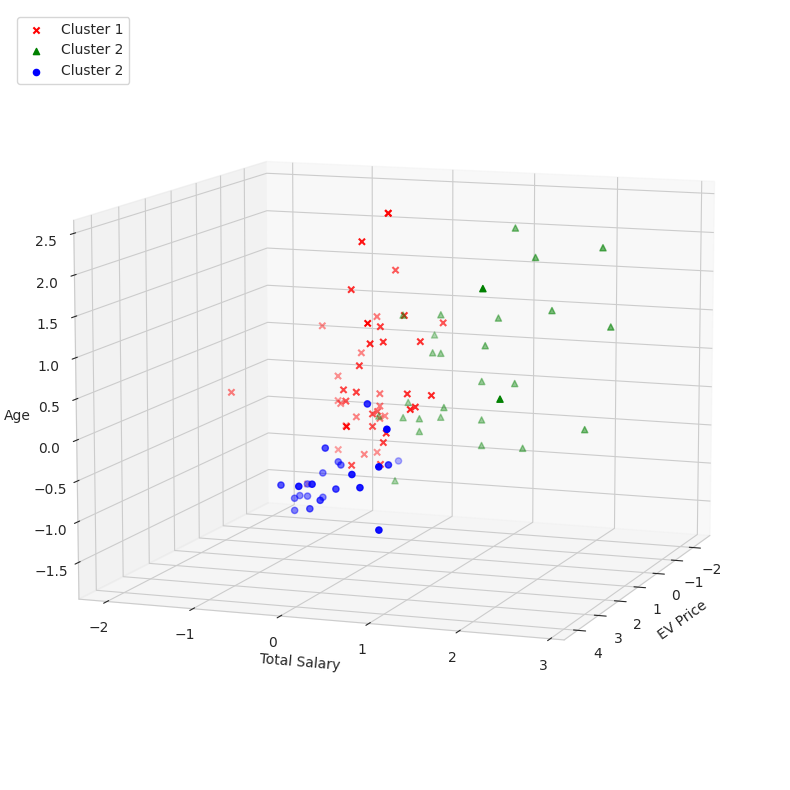

In [ ]:
# plotting influence of age

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green',marker = "^", label = 'Cluster 2')
ax.scatter(Cluster_2.EV_Price, Cluster_2['Total Salary'],Cluster_2['Age'], color='blue', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.tight_layout()
plt.show()

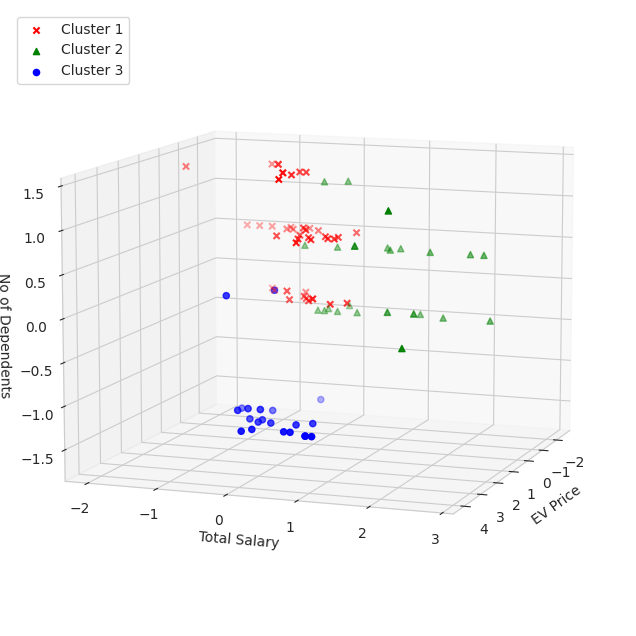

In [ ]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green',marker = "^", label = 'Cluster 2')
ax.scatter(Cluster_2.EV_Price, Cluster_2['Total Salary'],Cluster_2['No of Dependents'], color='blue', label = 'Cluster 3')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

# Vechicular Segmentation (Vechicle Features)

In [106]:
okk_path = "/content/ElectricCarData_Clean.csv"
okk = pd.read_csv(okk_path)
okk

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [107]:
okk.drop(columns = ['Brand','Model'],inplace = True)
okk


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [108]:
okk['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [109]:
okk['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [110]:
okk['RapidCharge'].unique()

array(['Yes', 'No'], dtype=object)

In [111]:
lb = LabelEncoder()
okk['RapidCharge']  = lb.fit_transform(okk['RapidCharge'])
nominal_cols = ['PowerTrain',	'PlugType',	'BodyStyle', 'Segment']
# Apply one-hot encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(okk[nominal_cols])

# Concatenate the one-hot encoded columns with the original DataFrame
okk = pd.concat([okk.drop(columns=nominal_cols), one_hot_encoded], axis=1)
okk

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,940,1,5,55480,1,0,...,1,0,0,0,0,1,0,0,0,0
1,10.0,160,270,167,250,1,5,30000,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,210,400,181,620,1,5,56440,1,0,...,0,0,0,0,0,1,0,0,0,0
3,6.8,180,360,206,560,1,5,68040,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.5,145,170,168,190,1,4,32997,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440,1,5,45000,0,1,...,0,0,0,0,1,0,0,0,0,0
99,4.5,210,335,258,540,1,5,96050,1,0,...,0,0,0,0,0,0,1,0,0,0
100,5.9,200,325,194,440,1,5,50000,1,0,...,0,0,0,0,1,0,0,0,0,0
101,5.1,200,375,232,450,1,5,65000,1,0,...,0,0,0,0,1,0,0,0,0,0


In [113]:
okk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccelSec                 103 non-null    float64
 1   TopSpeed_KmH             103 non-null    int64  
 2   Range_Km                 103 non-null    int64  
 3   Efficiency_WhKm          103 non-null    int64  
 4   FastCharge_KmH           103 non-null    object 
 5   RapidCharge              103 non-null    int64  
 6   Seats                    103 non-null    int64  
 7   PriceEuro                103 non-null    int64  
 8   PowerTrain_AWD           103 non-null    uint8  
 9   PowerTrain_FWD           103 non-null    uint8  
 10  PowerTrain_RWD           103 non-null    uint8  
 11  PlugType_Type 1 CHAdeMO  103 non-null    uint8  
 12  PlugType_Type 2          103 non-null    uint8  
 13  PlugType_Type 2 CCS      103 non-null    uint8  
 14  PlugType_Type 2 CHAdeMO  1

In [115]:

okk['FastCharge_KmH'].replace('-', np.nan, inplace=True)
okk['FastCharge_KmH'] = okk['FastCharge_KmH'].astype(float)
# Extract continuous variables
continuous_vars = ['AccelSec',	'TopSpeed_KmH',	'Range_Km',	'Efficiency_WhKm',	'FastCharge_KmH', 'PriceEuro']

# Perform standard scaling
scaler = StandardScaler()
okk[continuous_vars] = scaler.fit_transform(okk[continuous_vars])
okk

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,-0.931186,1.240881,0.886862,-0.957247,2.413510,1,5,-0.009761,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0.867167,-0.442660,-0.548531,-0.753325,-1.032469,1,5,-0.759866,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.897883,0.710450,0.488142,-0.277506,0.815375,1,5,0.018501,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.198524,0.018584,0.169166,0.572171,0.515725,1,5,0.359993,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.700653,-0.788593,-1.345971,-0.719338,-1.332119,1,4,-0.671638,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.034596,-0.442660,-0.070066,0.062365,-0.083576,1,5,-0.318281,0,1,...,0,0,0,0,1,0,0,0,0,0
99,-0.964489,0.710450,-0.030194,2.339498,0.415841,1,5,1.184579,1,0,...,0,0,0,0,0,0,1,0,0,0
100,-0.498249,0.479828,-0.109938,0.164326,-0.083576,1,5,-0.171087,1,0,...,0,0,0,0,1,0,0,0,0,0
101,-0.764672,0.479828,0.288782,1.455834,-0.033634,1,5,0.270498,1,0,...,0,0,0,0,1,0,0,0,0,0


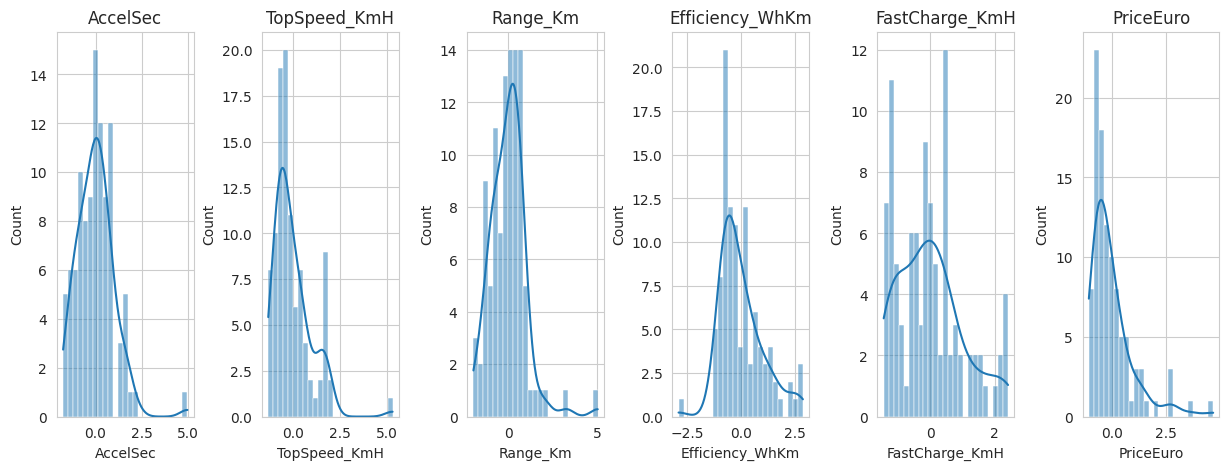

In [118]:

plt.figure(1, figsize=(15,5))
n=0

for x in continuous_vars:
  n += 1
  plt.subplot(1,len(continuous_vars),n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(okk[x], bins= 25, kde = True)
  plt.title(f'{x}')
plt.show()

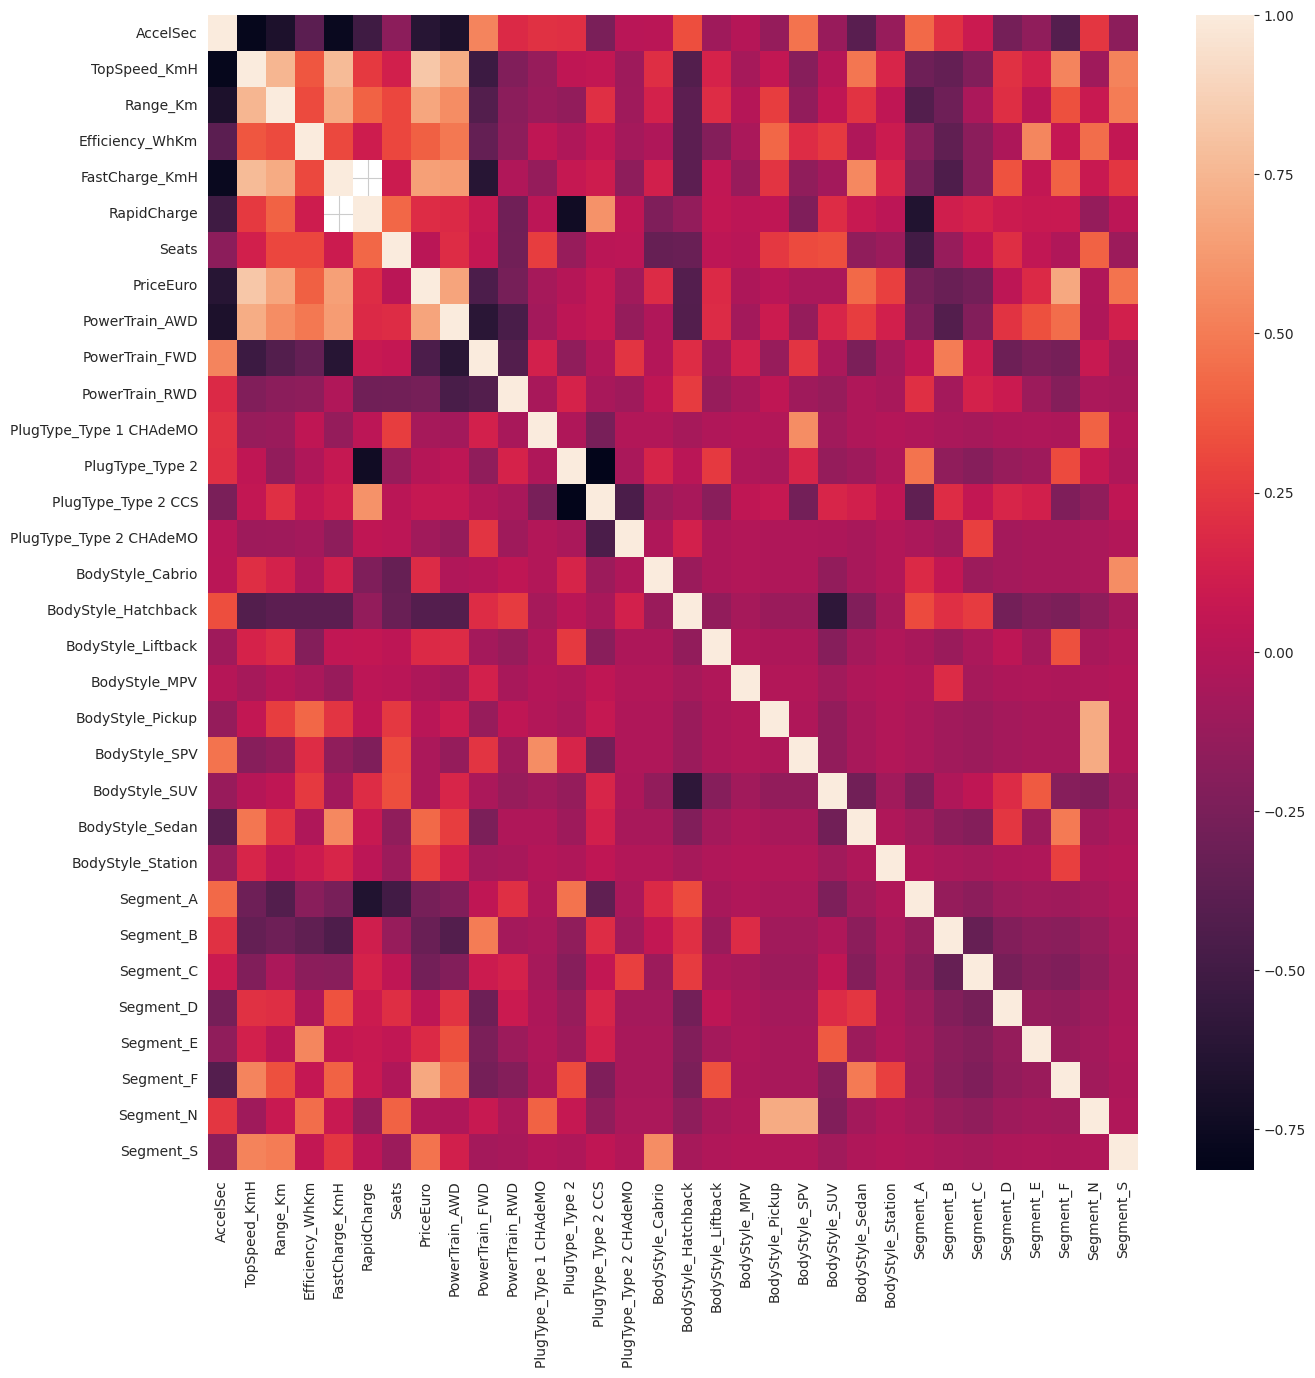

In [121]:
plt.figure(figsize=(15,15))
sns.heatmap(okk.corr(), annot=False)
plt.show()

In [125]:
okk.isna().sum()

AccelSec                   0
TopSpeed_KmH               0
Range_Km                   0
Efficiency_WhKm            0
FastCharge_KmH             5
RapidCharge                0
Seats                      0
PriceEuro                  0
PowerTrain_AWD             0
PowerTrain_FWD             0
PowerTrain_RWD             0
PlugType_Type 1 CHAdeMO    0
PlugType_Type 2            0
PlugType_Type 2 CCS        0
PlugType_Type 2 CHAdeMO    0
BodyStyle_Cabrio           0
BodyStyle_Hatchback        0
BodyStyle_Liftback         0
BodyStyle_MPV              0
BodyStyle_Pickup           0
BodyStyle_SPV              0
BodyStyle_SUV              0
BodyStyle_Sedan            0
BodyStyle_Station          0
Segment_A                  0
Segment_B                  0
Segment_C                  0
Segment_D                  0
Segment_E                  0
Segment_F                  0
Segment_N                  0
Segment_S                  0
dtype: int64

In [139]:
okk.dropna(inplace=True)
okk.isna().sum()

AccelSec                   0
TopSpeed_KmH               0
Range_Km                   0
Efficiency_WhKm            0
FastCharge_KmH             0
RapidCharge                0
Seats                      0
PriceEuro                  0
PowerTrain_AWD             0
PowerTrain_FWD             0
PowerTrain_RWD             0
PlugType_Type 1 CHAdeMO    0
PlugType_Type 2            0
PlugType_Type 2 CCS        0
PlugType_Type 2 CHAdeMO    0
BodyStyle_Cabrio           0
BodyStyle_Hatchback        0
BodyStyle_Liftback         0
BodyStyle_MPV              0
BodyStyle_Pickup           0
BodyStyle_SPV              0
BodyStyle_SUV              0
BodyStyle_Sedan            0
BodyStyle_Station          0
Segment_A                  0
Segment_B                  0
Segment_C                  0
Segment_D                  0
Segment_E                  0
Segment_F                  0
Segment_N                  0
Segment_S                  0
labels                     0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

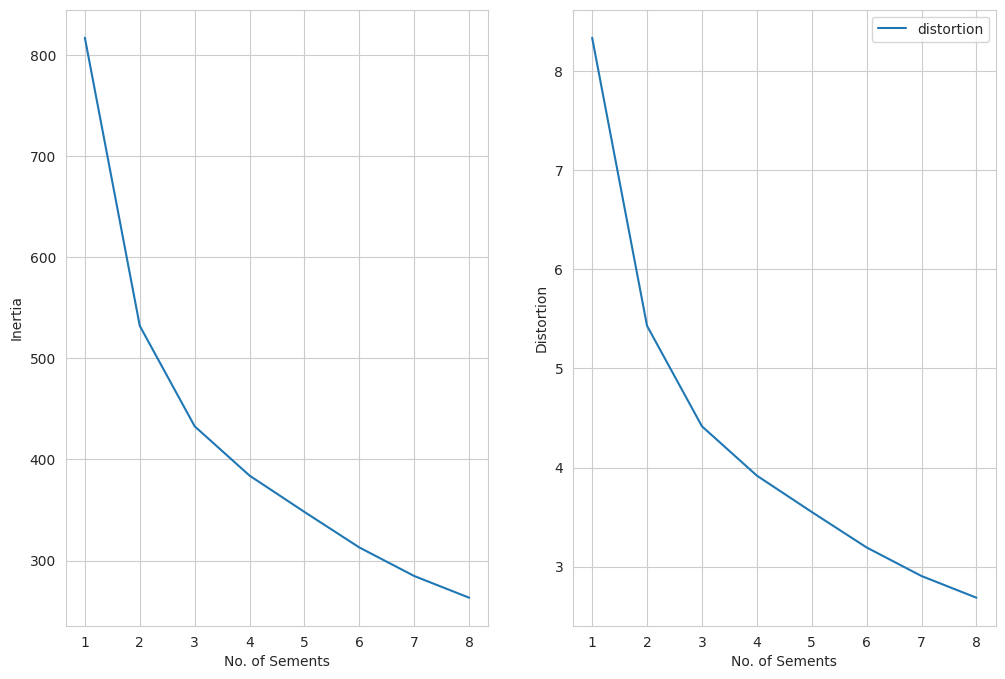

In [127]:
cluster_range = np.arange(1,9)
labels_true = []
inertia = []
for i in cluster_range:
  km = KMeans(n_clusters = i)
  km.fit(okk)
  inertia.append(km.inertia_)
  labels_true.append(km.labels_)

distortion = [inertia[i] / okk.shape[0] for i in range(len(inertia))]

fig,ax = plt.subplots(figsize = (12,8),nrows = 1 , ncols = 2)
ax[0].plot(cluster_range,inertia,label = 'inertia')
ax[0].set_ylabel('Inertia')
ax[0].set_xlabel('No. of Sements')
ax[1].plot(cluster_range,distortion, label = 'distortion')
ax[1].set_ylabel('Distortion')
ax[1].set_xlabel('No. of Sements')
plt.legend()
plt.show()

Text(0, 0.5, 'Sum of within clusters')

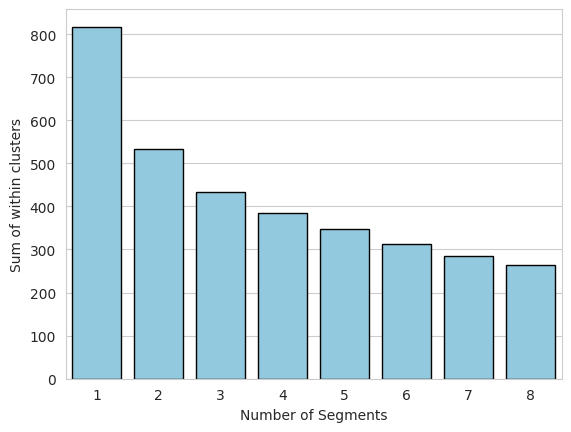

In [128]:
sns.barplot(x= cluster_range, y=inertia, color='skyblue', edgecolor='black')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of within clusters')

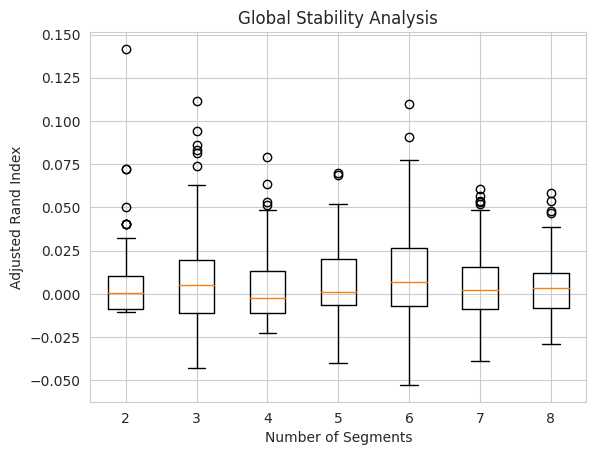

In [129]:
# Set seed for reproducibility
np.random.seed(1234)

# Number of segments (clusters) to consider
num_segments_range = np.arange(2, 9)

# Number of bootstrap samples
nboot = 100

# Number of random initializations for k-means
nrep = 10

# Function to calculate adjusted Rand index for clustering
def calculate_adjusted_rand_index(labels_true, labels_pred):
    return adjusted_rand_score(labels_true, labels_pred)

def bootstrap_stability_analysis(data, num_segments, nboot, nrep):
  stability_scores = []
  # Store labels_pred from each bootstrap
  all_labels = []

  for _ in range(nboot):

      # Bootstrap sample
      bootstrap_sample = resample(data, replace=True)

      # K-means
      kmeans = KMeans(n_clusters=num_segments, n_init=nrep)
      labels_pred = kmeans.fit_predict(bootstrap_sample)

      # Store labels_pred
      all_labels.append(labels_pred)

  # Get labels_true as mode across all bootstraps
  stacked = np.stack(all_labels)
  labels_true = mode(stacked, axis=0).mode

  for labels_pred in all_labels:

      # Calculate ARI for each bootstrap
      ari = calculate_adjusted_rand_index(labels_true, labels_pred)
      stability_scores.append(ari)

  return np.array(stability_scores)

stability_results = []

for num_segments in num_segments_range:
  stability_scores = bootstrap_stability_analysis(okk, num_segments, nboot, nrep)
  stability_results.append(stability_scores)

plt.boxplot(stability_results, labels=num_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


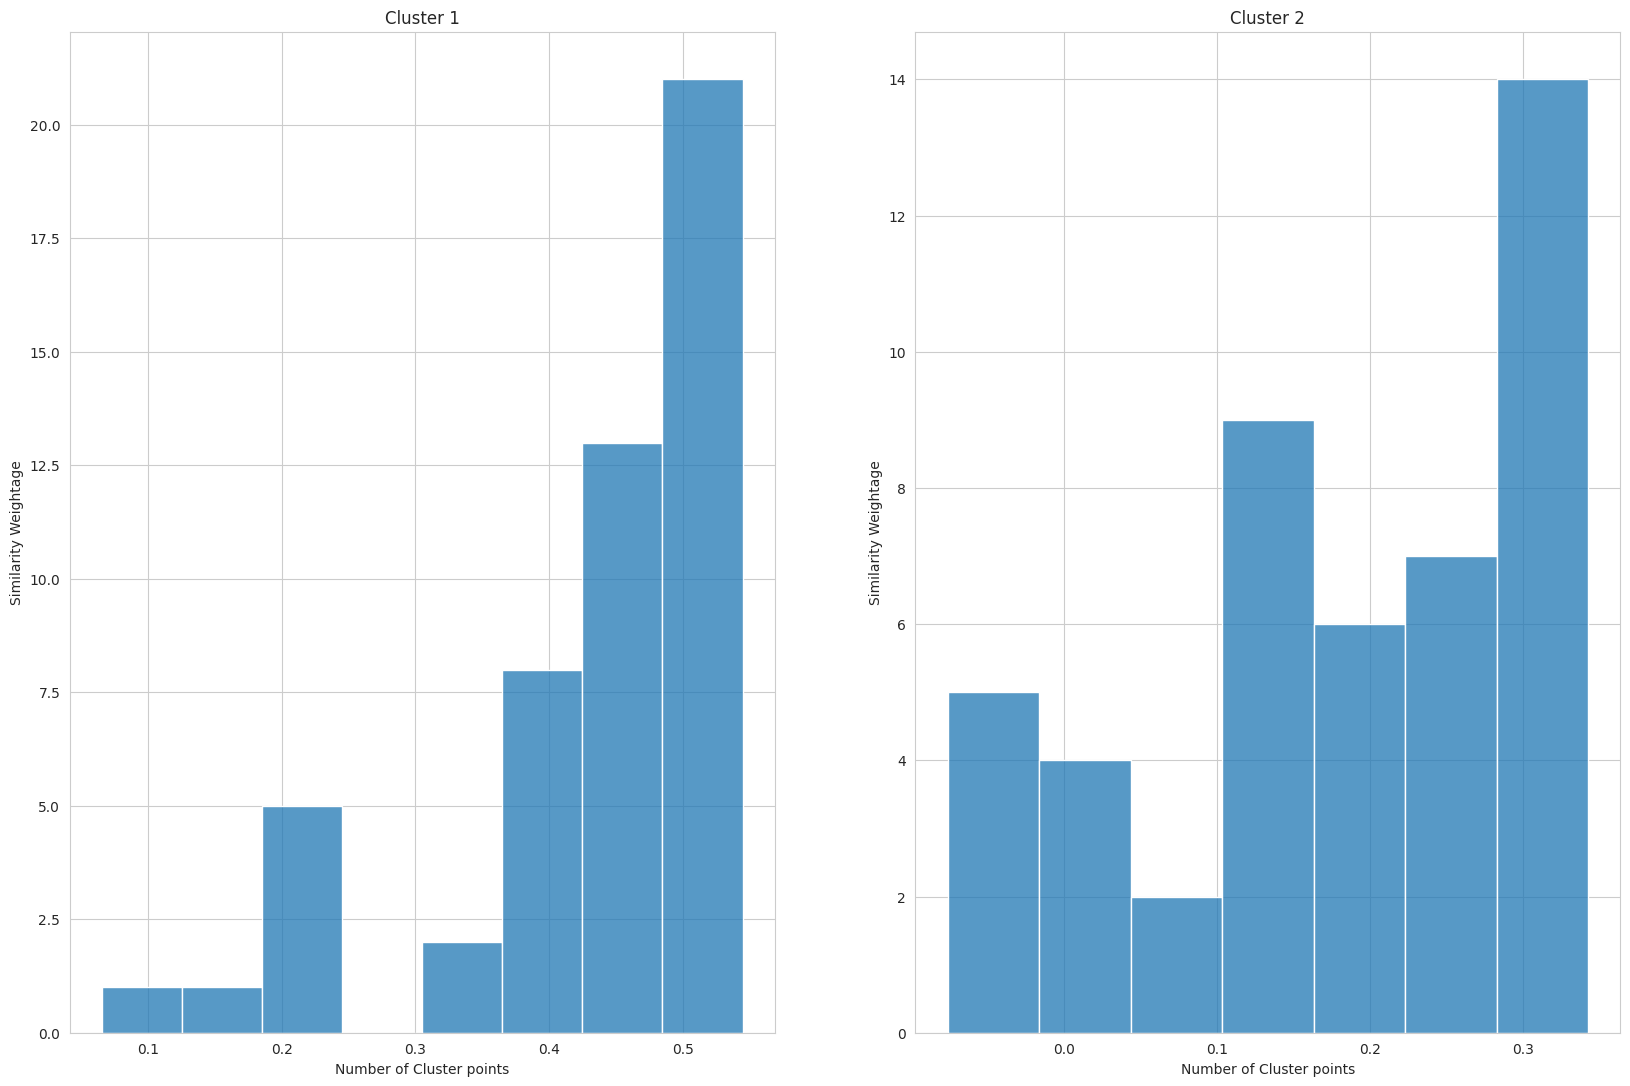

In [130]:
kmeans = KMeans(n_clusters = 2, random_state = 123)
labels = kmeans.fit_predict(okk)

silhouette_avg = silhouette_score(okk,labels)
sample_silhouette_values = silhouette_samples(okk, labels)
fig,ax = plt.subplots(figsize = (20,13), nrows = 1, ncols = 2)

plt.title('Gorge Plot for 2 selected Segments or Clusters using Global Stability')

first_cluster_silhouette_values = sample_silhouette_values[labels == 0]
first_cluster_silhouette_values.sort()

ax[0].set_title('Cluster 1')
ax[0].set_xlabel('Number of Cluster points')
ax[0].set_ylabel('Similarity Weightage')

sns.histplot(first_cluster_silhouette_values,ax = ax[0])

second_cluster_silhouette_values = sample_silhouette_values[labels == 1]
second_cluster_silhouette_values.sort()

ax[1].set_title('Cluster 2')
ax[1].set_xlabel('Number of Cluster points')
ax[1].set_ylabel('Similarity Weightage')

sns.histplot(second_cluster_silhouette_values,ax = ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

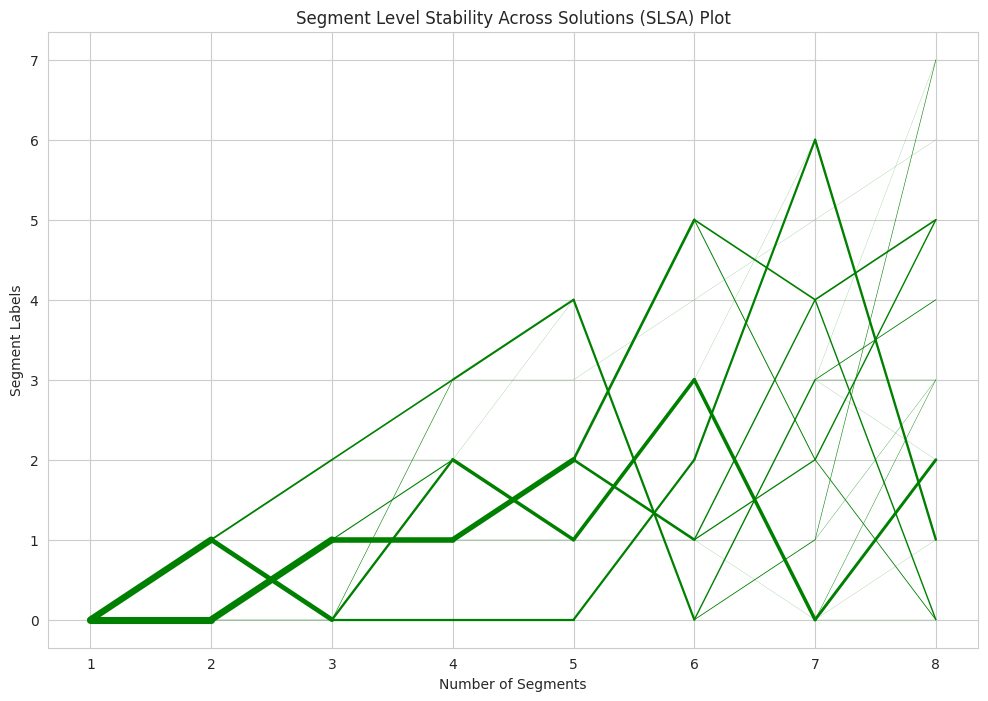

In [131]:
#identifying natural segment across solutions

num_clusters_range = range(1,9)
cluster_results = []

for num_cluster in num_clusters_range:
  kmeans_model = KMeans(n_clusters = num_cluster, random_state = 123)
  labels = kmeans_model.fit_predict(okk)
  cluster_results.append(labels)

fig,ax = plt.subplots(figsize = (12,8))
for i in range(len(num_clusters_range) - 1):
    current_labels = cluster_results[i]
    next_labels = cluster_results[i + 1]

    # Count the occurrences of each label pair
    label_pairs, counts = np.unique((current_labels, next_labels), axis=1, return_counts=True)

    for label_pair, count in zip(label_pairs.T, counts):
        ax.plot([i, i + 1], label_pair, linewidth=count/10, color='green')

ax.set_xticks(range(len(num_clusters_range)))
ax.set_xticklabels(num_clusters_range)
ax.set_xlabel('Number of Segments')
ax.set_ylabel('Segment Labels')
ax.set_title('Segment Level Stability Across Solutions (SLSA) Plot')

plt.show()


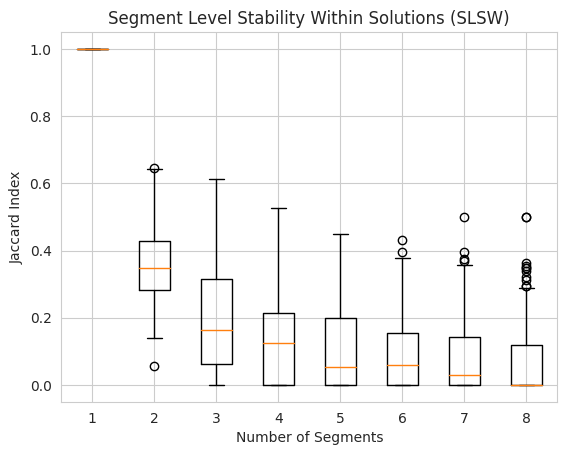

In [133]:
# Set seed for reproducibility
np.random.seed(1234)

# Function to calculate Jaccard index
def jaccard_index(seg1, seg2):
    intersection = np.sum(np.logical_and(seg1, seg2))
    union = np.sum(np.logical_or(seg1, seg2))
    return intersection / union if union != 0 else 0

# Function to calculate Segment Level Stability Within Solutions (SLSW)
def slsw(data, k, nboot, nrep):
    all_segments = []

    for _ in range(nboot):
        bootstrap_sample = resample(data, replace=True)
        kmeans = KMeans(n_clusters=k, n_init=nrep)
        labels_pred = kmeans.fit_predict(bootstrap_sample)
        all_segments.append(labels_pred)

    # Get labels_true as mode across all bootstraps
    stacked = np.stack(all_segments)
    labels_true = mode(stacked, axis=0).mode

    # Calculate Jaccard index for each segment
    jaccard_indices = []

    for i in range(k):
        jaccard_values = []
        for j in range(nboot):
            jaccard_values.append(jaccard_index(labels_true == i, all_segments[j] == i))
        jaccard_indices.append(jaccard_values)

    return np.array(jaccard_indices)

# Example usage with an artificial dataset

num_segments_range = np.arange(1, 9)
nboot = 100
nrep = 10

# Calculate SLSW for each number of segments
slsw_results = []

for num_segments in num_segments_range:
    slsw_values = slsw(okk, num_segments, nboot, nrep)
    slsw_results.append(slsw_values)

# Flatten the 2D arrays within slsw_results
flattened_results = [arr.flatten() for arr in slsw_results]

# Plot boxplots for flattened SLSW values
plt.boxplot(flattened_results, labels=num_segments_range)
plt.xlabel('Number of Segments')
plt.ylabel('Jaccard Index')
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.show()

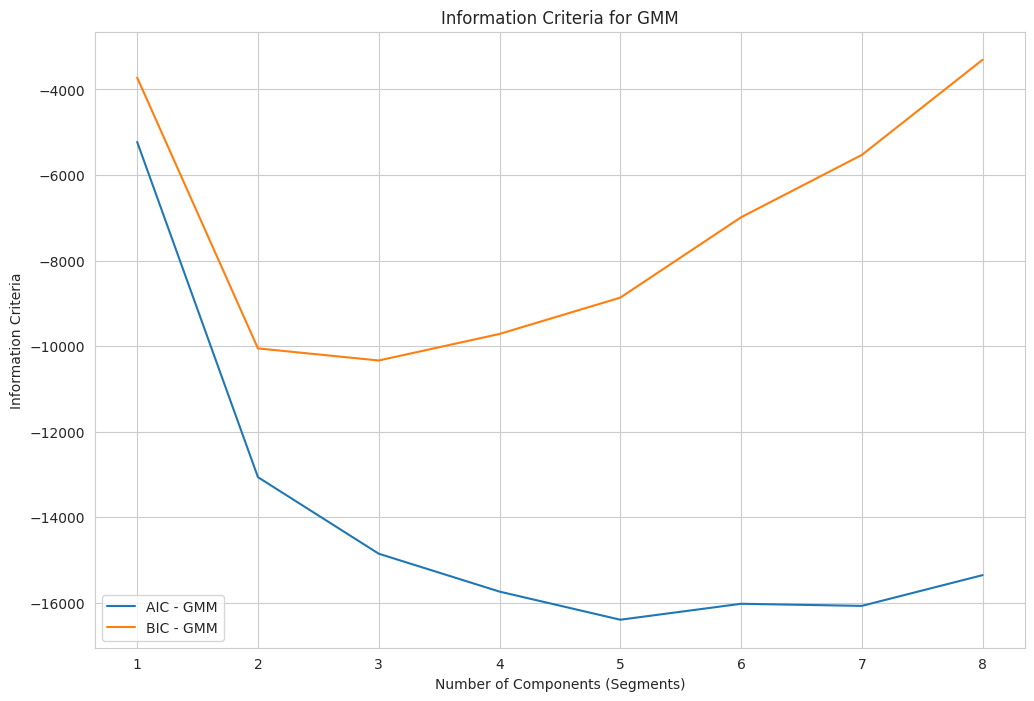

In [140]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Number of components (segments) to consider
num_components_range = range(1, 9)

# Number of random restarts for Gaussian Mixture Model
n_init = 10

# Perform Gaussian Mixture Model with varying number of components
gm_results = {'AIC': [], 'BIC': []}

for num_components in num_components_range:
    gmm = GaussianMixture(n_components=num_components, n_init=n_init, random_state=1234)
    gmm.fit(okk)  # Use okk DataFrame here instead of data
    gm_results['AIC'].append(gmm.aic(okk))
    gm_results['BIC'].append(gmm.bic(okk))

# Plotting the Information Criteria
fig, ax = plt.subplots(figsize=(12, 8))

for criterion, label in zip(['AIC', 'BIC'], ['AIC', 'BIC']):
    ax.plot(num_components_range, gm_results[criterion], label=f'{label} - GMM')

ax.set_xlabel('Number of Components (Segments)')
ax.set_ylabel('Information Criteria')
ax.legend()
plt.title('Information Criteria for GMM')
plt.show()


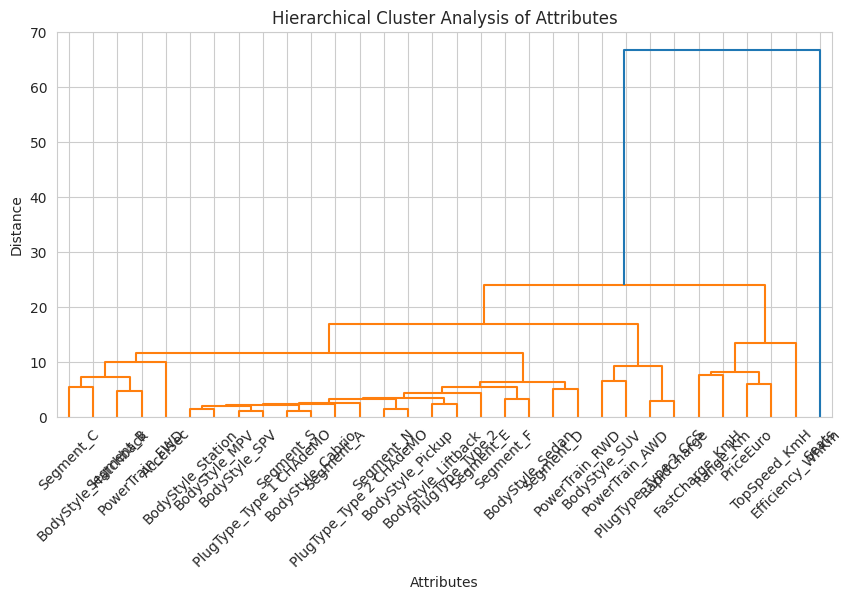

In [135]:
# Calculate hierarchical clustering
MD_vclust = linkage(okk.T, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust, labels=okk.columns, orientation='top', leaf_font_size=10, distance_sort='descending')
plt.title('Hierarchical Cluster Analysis of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

In [141]:
num_segments = 2
n_rep = 10
kmeans_model = KMeans(n_clusters = num_segments, random_state = 123, n_init= n_rep)
labels = kmeans_model.fit_predict(okk)

okk['labels'] = pd.Series(labels)
okk

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,...,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,labels
0,-0.931186,1.240881,0.886862,-0.957247,2.413510,1,5,-0.009761,1,0,...,0,0,0,0,1,0,0,0,0,1.0
1,0.867167,-0.442660,-0.548531,-0.753325,-1.032469,1,5,-0.759866,0,0,...,0,0,0,1,0,0,0,0,0,0.0
2,-0.897883,0.710450,0.488142,-0.277506,0.815375,1,5,0.018501,1,0,...,0,0,0,0,1,0,0,0,0,1.0
3,-0.198524,0.018584,0.169166,0.572171,0.515725,1,5,0.359993,0,0,...,0,0,0,0,1,0,0,0,0,1.0
4,0.700653,-0.788593,-1.345971,-0.719338,-1.332119,1,4,-0.671638,0,0,...,0,0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-0.564855,0.479828,0.647630,0.606158,0.216074,1,5,0.049706,1,0,...,0,0,0,1,0,0,0,0,0,0.0
94,0.534139,-0.673282,-0.708019,-0.719338,-0.632935,1,4,-0.527298,0,1,...,0,0,1,0,0,0,0,0,0,1.0
95,-0.032010,-0.442660,0.009678,-0.617377,0.066249,1,5,-0.595744,0,0,...,0,0,0,1,0,0,0,0,0,1.0
96,0.833864,-0.511847,-0.867507,-0.651364,-1.182294,1,5,-0.667634,0,1,...,0,0,1,0,0,0,0,0,0,1.0


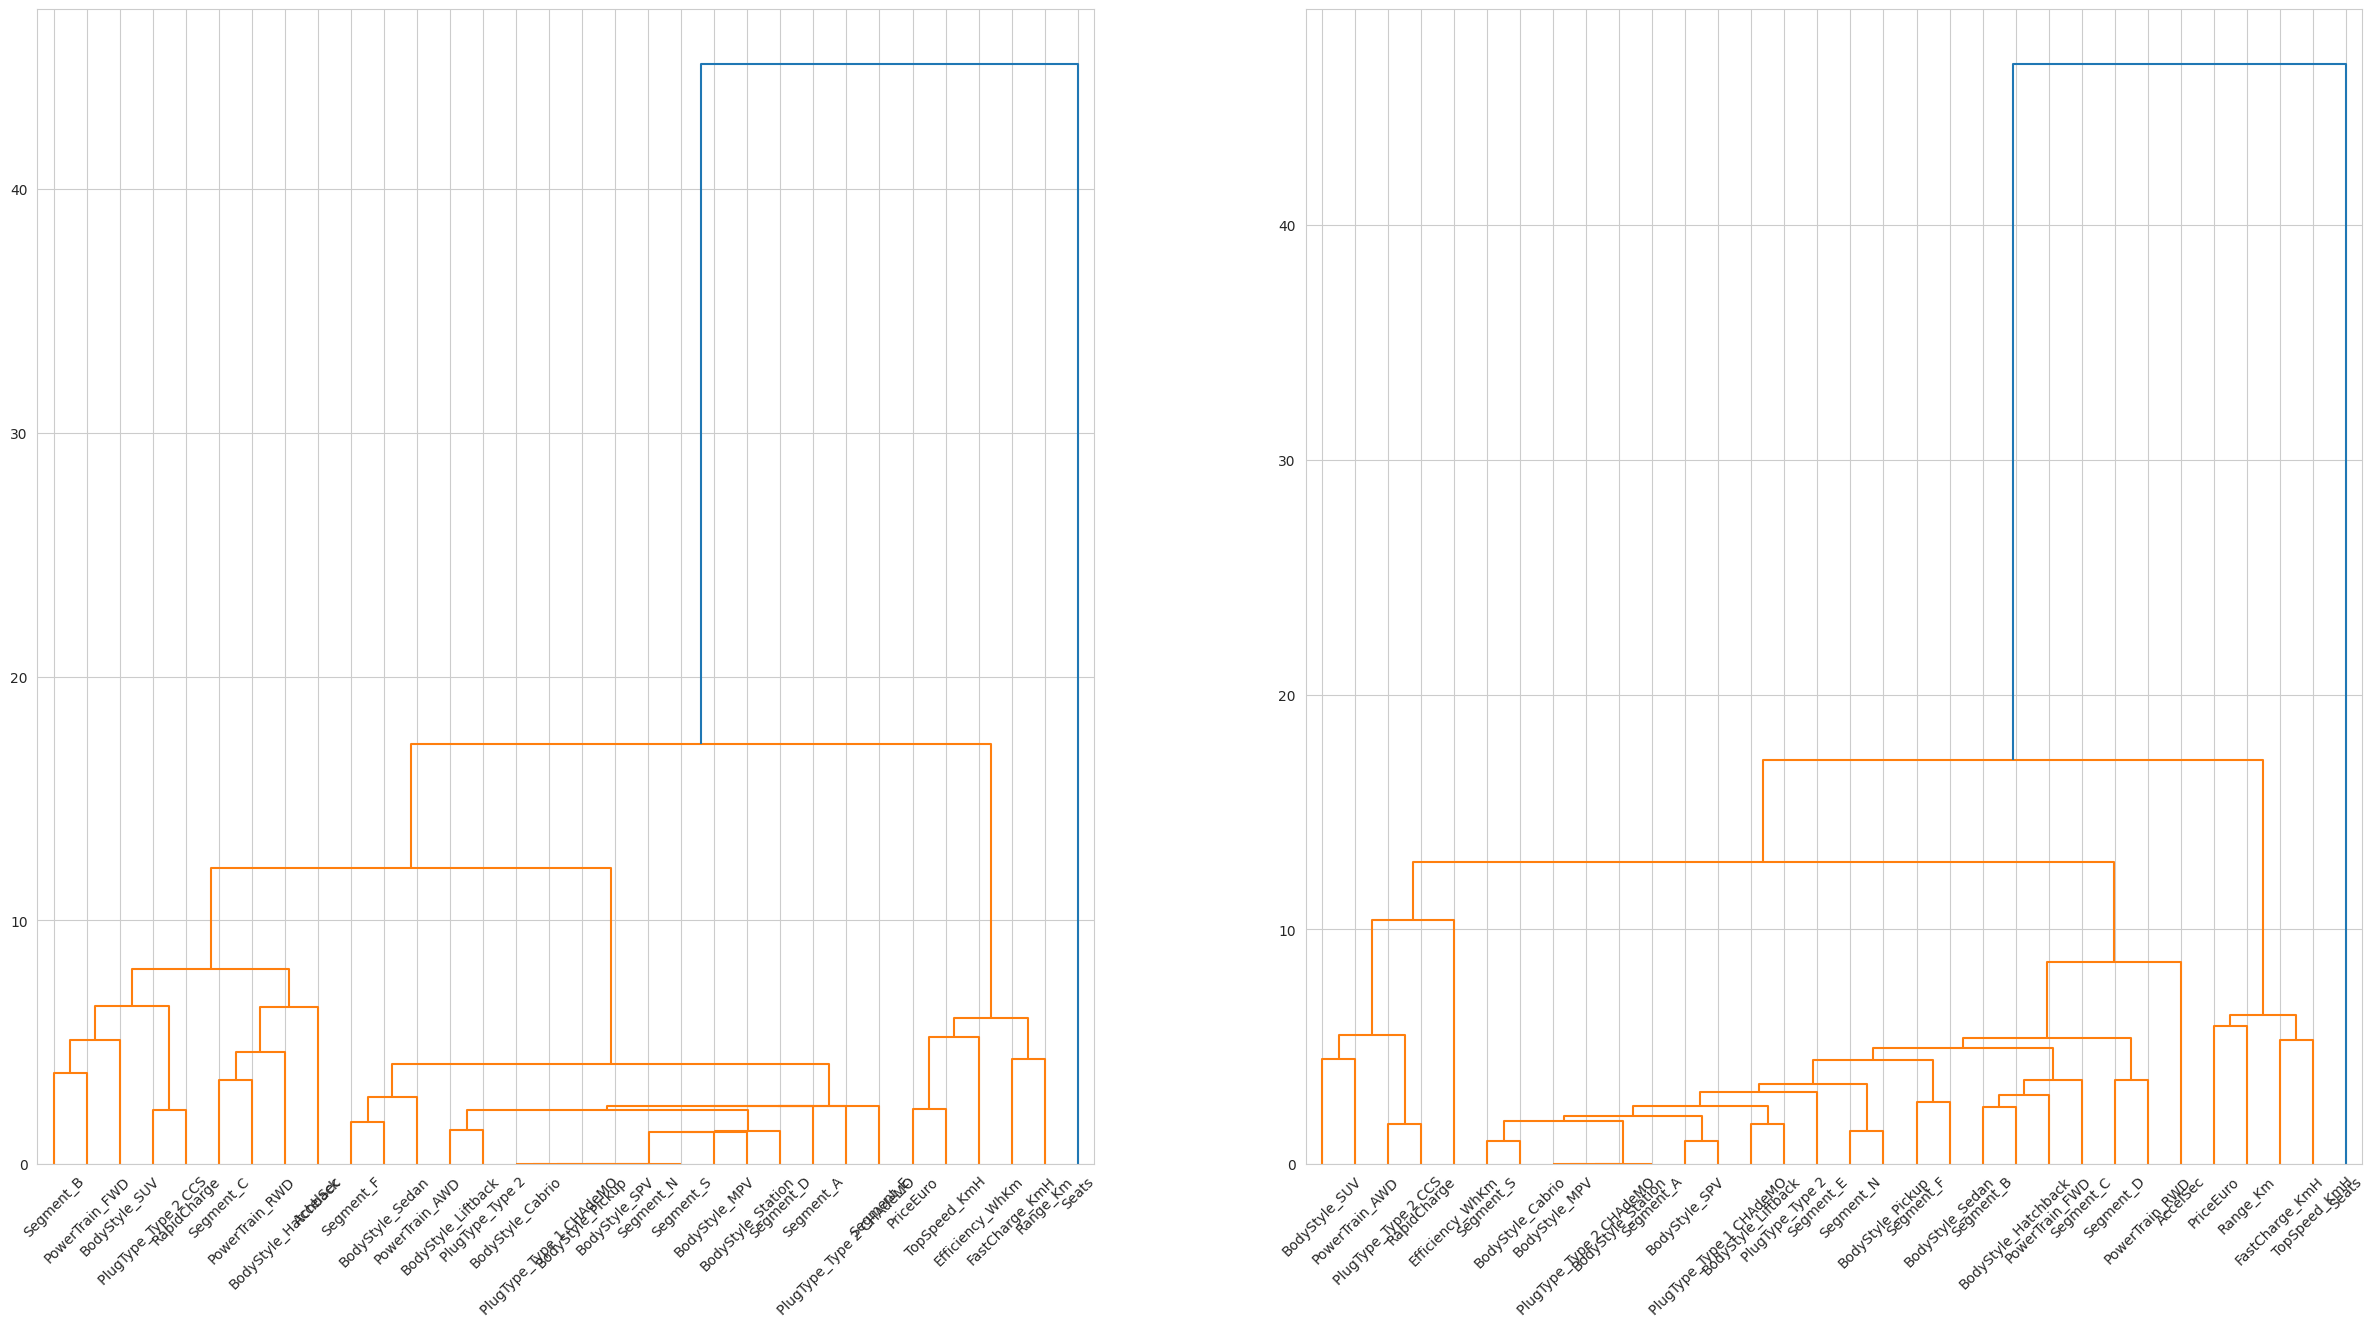

In [144]:
cluster_0 = okk[okk['labels'] == 0].drop(columns = ['labels'])
cluster_1 = okk[okk['labels'] == 1].drop(columns = ['labels'])




#hierachical_clustering of cluster_1 data samples
cluster_0_linkage = linkage(cluster_0.T, method='ward')
cluster_1_linkage = linkage(cluster_1.T, method='ward')



fig,ax = plt.subplots(figsize = (30,15),nrows = 1, ncols = 2)
dendrogram(cluster_0_linkage, labels=cluster_0.columns, orientation='top', leaf_font_size=10, distance_sort='descending', ax = ax[0])
dendrogram(cluster_1_linkage, labels=cluster_1.columns, orientation='top', leaf_font_size=10, distance_sort='descending', ax = ax[1])

plt.show()

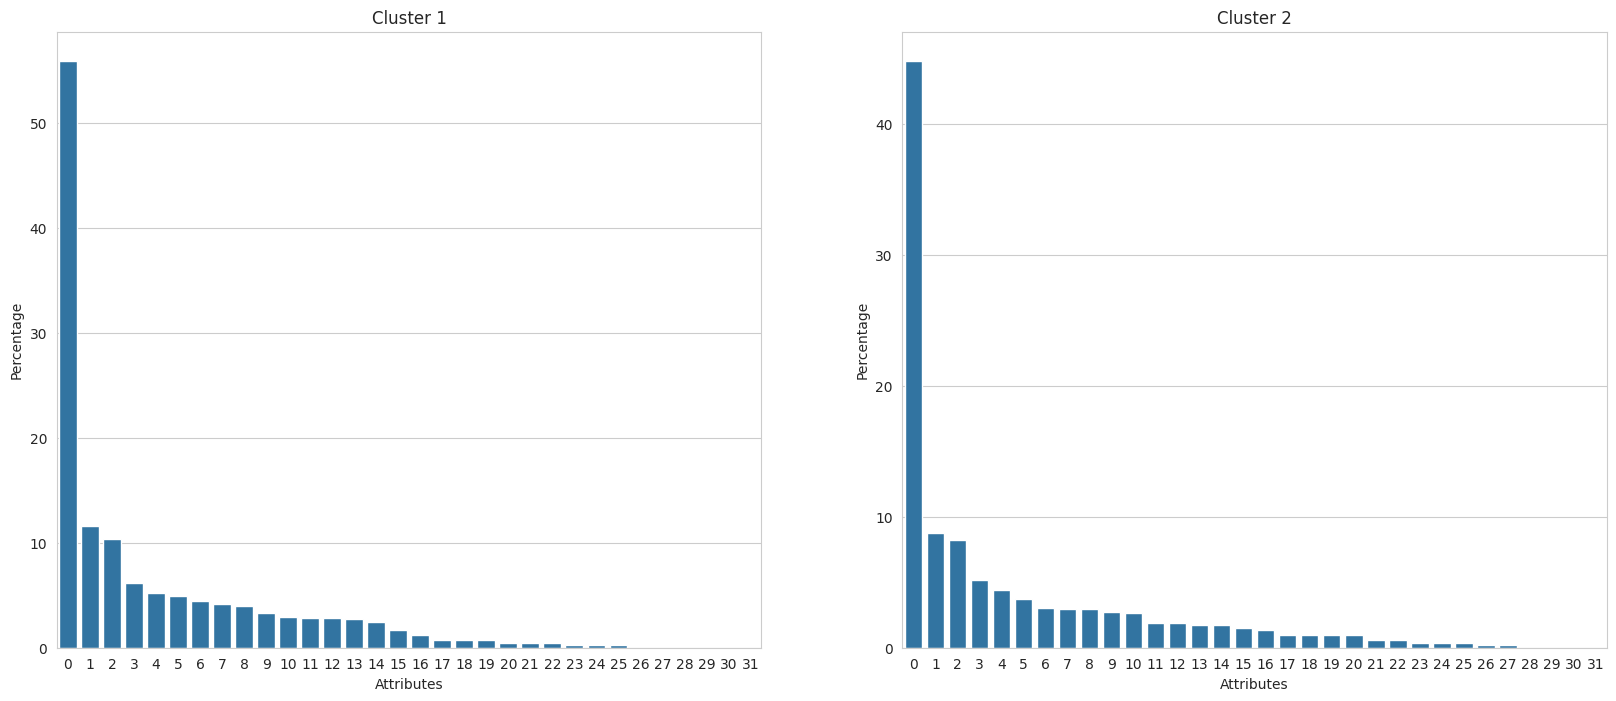

In [155]:
stats_cluster_0 = np.sort(np.abs(np.sum(cluster_0, axis = 0)*100/np.sum(np.sum(cluster_0, axis = 0))))[::-1]
stats_cluster_1 = np.sort(np.abs(np.sum(cluster_1, axis = 0)*100/np.sum(np.sum(cluster_1, axis = 0))))[::-1]


fig,ax = plt.subplots(figsize = (20,8), nrows = 1, ncols = 2)
sns.barplot(stats_cluster_0, ax = ax[0])

ax[0].set_title('Cluster 1')
ax[0].set_xlabel('Attributes')
ax[0].set_ylabel('Percentage')

sns.barplot(stats_cluster_1, ax = ax[1])


ax[1].set_title('Cluster 2')
ax[1].set_xlabel('Attributes')
ax[1].set_ylabel('Percentage')
plt.show()

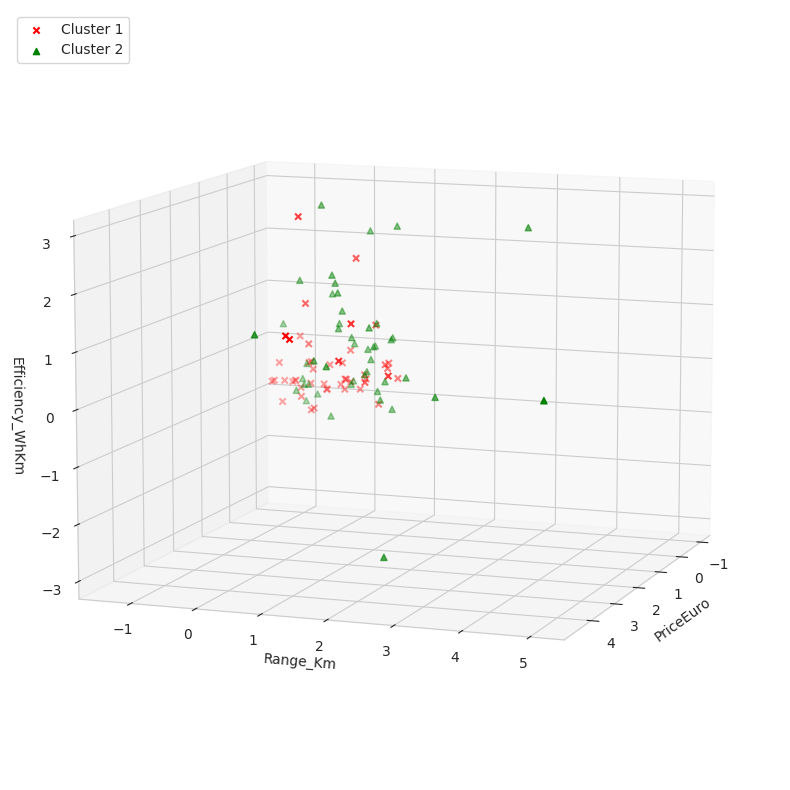

In [157]:
# plotting influence of price

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_0.PriceEuro, cluster_0['Range_Km'], cluster_0['Efficiency_WhKm'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(cluster_1.PriceEuro, cluster_1['Range_Km'],cluster_1['Efficiency_WhKm'], color='green',marker = "^", label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10, 20)

plt.xlabel("PriceEuro")
plt.ylabel("Range_Km")
ax.set_zlabel('Efficiency_WhKm')
plt.tight_layout()
plt.show()

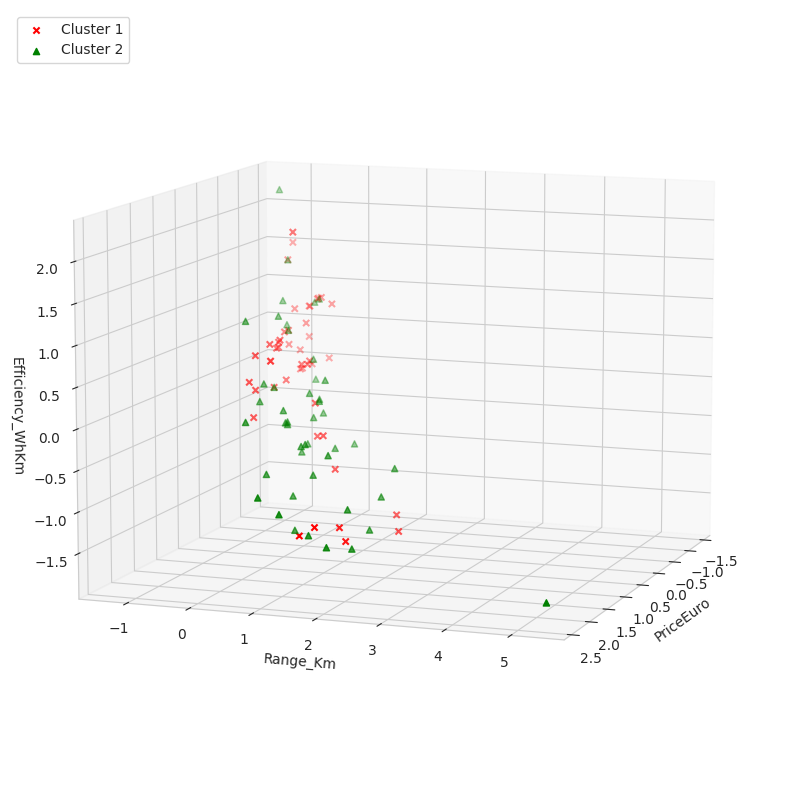

In [159]:
# plotting influence of age

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(cluster_0.FastCharge_KmH, cluster_0['TopSpeed_KmH'], cluster_0['AccelSec'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(cluster_1.	FastCharge_KmH, cluster_1['TopSpeed_KmH'],cluster_1['AccelSec'], color='green',marker = "^", label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10, 20)

plt.xlabel("PriceEuro")
plt.ylabel("Range_Km")
ax.set_zlabel('Efficiency_WhKm')
plt.tight_layout()
plt.show()